#Import Libraries

In [ ]:
!pip install factor_analyzer streamlit shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 254.7 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime as dt
import urllib.request
import json
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
# from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.feature_selection import RFE
import shap
from sklearn.inspection import PartialDependenceDisplay
import pickle
from imblearn.over_sampling import SMOTE


# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

# Data Understanding

In [ ]:
df=pd.read_excel("esgdata.xlsx","esgdata")
df

,Year,Company_name,SEC_code,Industry_type,CSR_commitee,CSR_board_size,Compliance_environmental_laws,EPA_fines,Amount_of_fines,SDG_targets,Issue_green_bonds,Govt_collaboration,Total_carbon_emissions,Direct_carbon_emissions,Indirect_carbon_emissions,Scope3_carbon_emissions,Environmental_scores,Disclosure_scores,Energy_conservation,Water_treatment,Recycling,Biodiversity,Waste_management,Green_innovation,GHG_sales,Net_zero_targets,Disclosure_of_R&D,Climate_change_policy,Renewal_energy,Dow_jones_sustainability_index,FTSE4Good_Index,MSCI_ESG_index,Global_reporting_initiative,Integrated_reporting_framework,Risk_score,Controversy_level,Planning_zero_carbon,ESG_funds
0,2017,3M,MMM,1,0,0,1,0,0.0,ESG,0,1.0,5840,3960,1880.00,9340.00,54.21,61.57,1,1,1,1,1,1.0,152.22,1,0,1,1,1,2.0,3,1,0.0,33.61,3,0.0,844
1,2017,Abbott Laboratories,ABT,6,0,0,0,0,0.0,ESG,0,1.0,1044,541,503.00,7600.00,71.94,72.20,1,1,1,1,1,1.0,27.64,0,1,1,0,1,2.0,3,0,0.0,24.98,3,0.0,968
2,2017,AbbVie,ABBV,6,1,5,0,0,0.0,ESG,0,0.0,627,293,334.00,0.00,38.27,58.81,1,1,0,0,1,0.0,14.65,0,1,1,1,1,0.0,3,0,0.0,27.84,3,0.0,1124
3,2017,ABM Industries,ABM,1,0,0,0,0,0.0,ESG,0,0.0,57.67,39.38,8.30,0.00,15.80,44.07,1,1,0,1,1,1.0,7.03,0,0,0,0,1,0.0,0,1,0.0,0.00,0,0.0,90
4,2017,Activision Blizzard,ATVI,1,0,0,0,0,0.0,G,0,0.0,0,0,0.00,0.00,14.38,37.80,0,0,0,0,0,0.0,3.12,1,0,0,0,1,0.0,3,0,0.0,18.94,4,0.0,706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,2021,XPO Logistics,XPO,18,1,3,1,0,0.0,ESG,0,0.0,1444.7,1401.01,43.70,917.06,38.66,50.43,1,1,1,0,1,1.0,132.85,1,0,1,0,1,0.0,0,1,0.0,25.74,3,0.0,135
2309,2021,Yum Brands,YUM,5,0,0,0,0,0.0,ESG,0,0.0,156.63,39.01,117.62,35134.50,47.84,62.03,1,1,1,0,1,1.0,27.13,1,1,1,1,1,2.0,3,1,0.0,20.55,2,1.0,608
2310,2021,Yum China Holdings,YUMC,5,1,4,0,0,0.0,ESG,0,0.0,2317.74,158.89,2158.86,8446.96,27.33,51.99,1,1,1,1,1,1.0,277.02,1,1,1,1,1,2.0,3,1,0.0,20.21,2,0.0,566
2311,2021,Zimmer Biomet Holdings,ZBH,8,1,4,0,0,0.0,ESG,0,0.0,50.99,0,0.00,0.00,17.64,44.43,1,1,0,1,1,0.0,7.66,0,1,1,0,1,0.0,3,0,0.0,27.30,2,0.0,569


In [ ]:
definition=pd.read_excel("esgdata.xlsx","definition")
definition

,Column,Description
0,Year,The calendar year (2017 to 2021) the data pert...
1,Company_name,The name of the Fortune 500 company.
2,SEC_code,"A unique identifier code for the company, like..."
3,Industry_type,A numerical code representing the industry sec...
4,CSR_committee,Indicates whether the company has a dedicated ...
5,CSR_board_size,The size of the CSR committee or board within ...
6,Compliance_environmental_laws,Indicates compliance with environmental laws (...
7,EPA_fines,Indicates whether the company has been fined b...
8,Amount_of_fines,The total monetary amount of fines levied agai...
9,SDG_targets,Indicates the company's commitment or alignmen...


In [ ]:
industry=pd.read_excel("esgdata.xlsx","industry_type",usecols=[1])
industry

,Business Services
0,Apparel
1,Chemical
2,Energy
3,"Food, Beverages & Tobacco"
4,Health care
5,Industrials and Manufacturing
6,Materials
7,Rengineeing and Construction
8,Media
9,Telecommunications


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313 entries, 0 to 2312
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            2313 non-null   int64  
 1   Company_name                    2313 non-null   object 
 2   SEC_code                        2313 non-null   object 
 3   Industry_type                   2313 non-null   int64  
 4   CSR_commitee                    2313 non-null   int64  
 5   CSR_board_size                  2313 non-null   int64  
 6   Compliance_environmental_laws   2313 non-null   int64  
 7   EPA_fines                       2313 non-null   int64  
 8   Amount_of_fines                 2313 non-null   float64
 9   SDG_targets                     2313 non-null   object 
 10  Issue_green_bonds               2313 non-null   int64  
 11  Govt_collaboration              2311 non-null   float64
 12  Total_carbon_emissions          23

In [ ]:
df.GHG_sales.replace({"No":0},inplace=True)
df.Direct_carbon_emissions.replace({"433,63":433.63,"29..80":29.8},inplace=True)
df.Total_carbon_emissions.replace({"40.3/02":40.3, "8.159.97":8159.97,"33.064.3":33064.3},inplace=True)
df.SDG_targets.replace({0:"-"},inplace=True)

In [ ]:
comps=df.SEC_code.unique()
df_score = pd.DataFrame()

for comp in comps:
  url = "https://query2.finance.yahoo.com/v1/finance/esgChart?symbol="+comp
  try:
    connection = urllib.request.urlopen(url)
    data = connection.read()
    data_2 = json.loads(data)
    Formatdata = data_2["esgChart"]["result"][0]["symbolSeries"]
    Formatdata_2 = pd.DataFrame(Formatdata)
    Formatdata_2["timestamp"] = pd.to_datetime(Formatdata_2["timestamp"], unit="s")
    Formatdata_2['Year']=Formatdata_2.timestamp.astype(str).str[:4]
    Formatdata_2=Formatdata_2.groupby("Year").mean().round(2)
    Formatdata_2.reset_index(inplace=True)
    Formatdata_2["SEC_code"]=comp
    Formatdata_2.drop("timestamp",axis=1,inplace=True)
    df_score = pd.concat([df_score, Formatdata_2], ignore_index=True)
  except:
    pass
df_score["Year"]=df_score.Year.astype(int)
df_score

,Year,esgScore,governanceScore,environmentScore,socialScore,SEC_code
0,2014,72.75,73.00,72.75,74.00,MMM
1,2015,74.08,78.08,71.17,74.83,MMM
2,2016,70.76,78.02,68.10,68.61,MMM
3,2017,65.87,75.18,56.33,70.12,MMM
4,2018,65.27,71.85,57.53,69.38,MMM
...,...,...,...,...,...,...
3462,2019,58.72,62.39,63.59,52.16,HRL
3463,2020,26.24,4.98,10.02,11.23,HRL
3464,2021,26.10,5.04,10.73,10.32,HRL
3465,2022,28.74,6.21,11.40,11.14,HRL


In [ ]:
df = df.merge(df_score, on=["Year","SEC_code"], how="inner")
df

,Year,Company_name,SEC_code,Industry_type,CSR_commitee,CSR_board_size,Compliance_environmental_laws,EPA_fines,Amount_of_fines,SDG_targets,Issue_green_bonds,Govt_collaboration,Total_carbon_emissions,Direct_carbon_emissions,Indirect_carbon_emissions,Scope3_carbon_emissions,Environmental_scores,Disclosure_scores,Energy_conservation,Water_treatment,Recycling,Biodiversity,Waste_management,Green_innovation,GHG_sales,Net_zero_targets,Disclosure_of_R&D,Climate_change_policy,Renewal_energy,Dow_jones_sustainability_index,FTSE4Good_Index,MSCI_ESG_index,Global_reporting_initiative,Integrated_reporting_framework,Risk_score,Controversy_level,Planning_zero_carbon,ESG_funds,esgScore,governanceScore,environmentScore,socialScore
0,2017,3M,MMM,1,0,0,1,0,0.0,ESG,0,1.0,5840.00,3960.00,1880.00,9340.00,54.21,61.57,1,1,1,1,1,1.0,152.22,1,0,1,1,1,2.0,3,1,0.0,33.61,3,0.0,844,65.87,75.18,56.33,70.12
1,2017,Abbott Laboratories,ABT,6,0,0,0,0,0.0,ESG,0,1.0,1044.00,541.00,503.00,7600.00,71.94,72.20,1,1,1,1,1,1.0,27.64,0,1,1,0,1,2.0,3,0,0.0,24.98,3,0.0,968,67.26,68.26,76.93,61.22
2,2017,AbbVie,ABBV,6,1,5,0,0,0.0,ESG,0,0.0,627.00,293.00,334.00,0.00,38.27,58.81,1,1,0,0,1,0.0,14.65,0,1,1,1,1,0.0,3,0,0.0,27.84,3,0.0,1124,65.72,72.53,71.54,57.96
3,2017,Activision Blizzard,ATVI,1,0,0,0,0,0.0,G,0,0.0,0.00,0.00,0.00,0.00,14.38,37.80,0,0,0,0,0,0.0,3.12,1,0,0,0,1,0.0,3,0,0.0,18.94,4,0.0,706,47.02,58.82,41.29,44.28
4,2017,Adobe,ADBE,12,0,0,0,0,0.0,ESG,0,0.0,80.75,14.48,66.27,96.05,53.46,62.35,1,0,0,0,1,1.0,4.78,0,1,1,1,1,2.0,3,1,0.0,12.46,1,0.0,1448,71.24,68.09,79.17,67.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,2021,Willams,WMB,3,1,5,0,1,28528.0,ESG,0,0.0,11920.00,10260.00,1660.00,20506.50,51.92,66.42,1,1,0,1,1,1.0,1320.91,1,0,1,0,0,2.0,3,1,0.0,23.50,2,0.0,674,20.75,3.22,9.00,8.52
1757,2021,Xcel Energy,XEL,4,1,6,1,0,0.0,ESG,0,0.0,40.20,39500.00,700.00,0.00,57.90,70.23,1,1,0,1,1,1.0,3524.73,1,0,1,1,1,0.0,3,1,0.0,23.70,2,1.0,373,29.23,4.24,16.26,8.73
1758,2021,Yum Brands,YUM,5,0,0,0,0,0.0,ESG,0,0.0,156.63,39.01,117.62,35134.50,47.84,62.03,1,1,1,0,1,1.0,27.13,1,1,1,1,1,2.0,3,1,0.0,20.55,2,1.0,608,20.72,4.50,3.82,12.39
1759,2021,Zimmer Biomet Holdings,ZBH,8,1,4,0,0,0.0,ESG,0,0.0,50.99,0.00,0.00,0.00,17.64,44.43,1,1,0,1,1,0.0,7.66,0,1,1,0,1,0.0,3,0,0.0,27.30,2,0.0,569,32.94,10.35,4.74,17.84


In [ ]:
df[(df.Year<=2019) & (df.esgScore<40)][["Year","SEC_code","Environmental_scores","Disclosure_scores","Risk_score","esgScore","governanceScore","environmentScore","socialScore"]]

,Year,SEC_code,Environmental_scores,Disclosure_scores,Risk_score,esgScore,governanceScore,environmentScore,socialScore
983,2019,RTX,34.25,47.56,34.98,30.00,8.27,7.99,13.75
1019,2019,TFC,15.55,46.00,18.16,25.42,10.39,2.01,13.02


In [ ]:
df.groupby("SEC_code")["Risk_score"].value_counts() #The original Risk score is not updated

SEC_code  Risk_score
AA        24.78         5
AAL       29.10         5
AAP       12.97         5
AAPL      16.41         5
ABBV      27.84         5
                       ..
XRX       16.89         3
Y         21.71         5
YUM       20.55         5
ZBH       27.30         5
ZTS       18.47         5
Name: count, Length: 364, dtype: int64

In [ ]:
old_sustainalytics=df[(df.Year<=2019) & (df.esgScore>=40)][["Year","SEC_code","Environmental_scores","Disclosure_scores","Risk_score","esgScore","governanceScore","environmentScore","socialScore"]]
old_sustainalytics[["esgScore","governanceScore","environmentScore","socialScore"]].describe()

,esgScore,governanceScore,environmentScore,socialScore
count,1056.000000,1056.000000,1056.000000,1056.000000
mean,58.870852,63.131004,58.327169,56.844688
std,8.079415,8.171880,12.683772,9.879457
min,40.140000,38.990000,30.600000,36.480000
25%,52.767500,57.697500,48.992500,49.485000
50%,58.720000,63.285000,57.510000,56.455000
75%,64.650000,68.935000,67.722500,63.132500
max,85.410000,88.900000,89.340000,90.910000


In [ ]:
def adjust_risk_score(score):
  return round((score-old_sustainalytics.esgScore.min())/(old_sustainalytics.esgScore.max()-old_sustainalytics.esgScore.min())*(df[(df.Year>2019)].esgScore.max()-df[(df.Year>2019)].esgScore.min())+df[(df.Year>2019)].esgScore.min(),2)
df.loc[(df.Year<=2019)  & (df.esgScore>40),"esgScore"]=df[(df.Year<=2019)  & (df.esgScore>40)]["esgScore"].apply(adjust_risk_score)

In [ ]:
df[(df.Year<=2019)][["Year","SEC_code","Environmental_scores","Disclosure_scores","Risk_score","esgScore","governanceScore","environmentScore","socialScore"]].describe()

,Year,Environmental_scores,Disclosure_scores,Risk_score,esgScore,governanceScore,environmentScore,socialScore
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,2018.006616,33.764187,51.259972,21.205652,25.707108,63.029301,58.226361,56.762533
std,0.815504,21.335385,19.777753,7.789820,7.871439,8.492465,12.882596,10.049192
min,2017.000000,0.000000,0.000000,0.000000,7.440000,8.270000,2.010000,13.020000
25%,2017.000000,16.790000,40.822500,15.832500,19.757500,57.667500,48.812500,49.432500
50%,2018.000000,34.025000,51.150000,21.510000,25.560000,63.270000,57.485000,56.420000
75%,2019.000000,49.620000,60.195000,26.160000,31.322500,68.915000,67.720000,63.110000
max,2019.000000,86.170000,559.200000,43.230000,51.580000,88.900000,89.340000,90.910000


In [ ]:
df[(df.Year>2019)][["esgScore","governanceScore","environmentScore","socialScore"]].describe()

,esgScore,governanceScore,environmentScore,socialScore
count,703.000000,703.000000,703.000000,703.000000
mean,23.769957,7.338592,5.850711,10.265605
std,7.672871,2.873486,5.575911,4.012098
min,7.440000,0.000000,0.000000,0.000000
25%,18.055000,5.465000,1.540000,7.750000
50%,23.070000,6.630000,3.790000,9.960000
75%,29.175000,8.560000,9.050000,12.795000
max,51.580000,17.780000,24.840000,26.870000


In [ ]:
df.loc[(df.Year<=2019),"totalScore"]=df.loc[(df.Year<=2019),"governanceScore"]+df.loc[(df.Year<=2019),"environmentScore"]+df.loc[(df.Year<=2019),"socialScore"]
df.loc[(df.Year<=2019),"governanceScore"]=df.loc[(df.Year<=2019),"governanceScore"]/df.loc[(df.Year<=2019),"totalScore"]*df.loc[(df.Year<=2019),"esgScore"]
df.loc[(df.Year<=2019),"environmentScore"]=df.loc[(df.Year<=2019),"environmentScore"]/df.loc[(df.Year<=2019),"totalScore"]*df.loc[(df.Year<=2019),"esgScore"]
df.loc[(df.Year<=2019),"socialScore"]=df.loc[(df.Year<=2019),"socialScore"]/df.loc[(df.Year<=2019),"totalScore"]*df.loc[(df.Year<=2019),"esgScore"]
df.drop("totalScore",axis=1,inplace=True)
df[(df.Year<=2019)][["esgScore","governanceScore","environmentScore","socialScore"]].describe()

,esgScore,governanceScore,environmentScore,socialScore
count,1058.000000,1058.000000,1058.000000,1058.000000
mean,25.707108,9.003267,8.482023,8.221818
std,7.871439,2.445014,3.144436,2.760069
min,7.440000,2.686049,2.010000,2.440188
25%,19.757500,7.227789,6.143272,6.080789
50%,25.560000,9.021481,8.246600,8.097908
75%,31.322500,10.746774,10.840045,10.050946
max,51.580000,16.420492,17.060470,18.282543


In [ ]:
df = df.round(2)
df.head(12)

,Year,Company_name,SEC_code,Industry_type,CSR_commitee,CSR_board_size,Compliance_environmental_laws,EPA_fines,Amount_of_fines,SDG_targets,Issue_green_bonds,Govt_collaboration,Total_carbon_emissions,Direct_carbon_emissions,Indirect_carbon_emissions,Scope3_carbon_emissions,Environmental_scores,Disclosure_scores,Energy_conservation,Water_treatment,Recycling,Biodiversity,Waste_management,Green_innovation,GHG_sales,Net_zero_targets,Disclosure_of_R&D,Climate_change_policy,Renewal_energy,Dow_jones_sustainability_index,FTSE4Good_Index,MSCI_ESG_index,Global_reporting_initiative,Integrated_reporting_framework,Risk_score,Controversy_level,Planning_zero_carbon,ESG_funds,esgScore,governanceScore,environmentScore,socialScore
0,2017,3M,MMM,1,0,0,1,0,0.0,ESG,0,1.0,5840.00,3960.00,1880.00,9340.00,54.21,61.57,1,1,1,1,1,1.0,152.22,1,0,1,1,1,2.0,3,1,0.0,33.61,3,0.0,844,32.53,12.13,9.09,11.31
1,2017,Abbott Laboratories,ABT,6,0,0,0,0,0.0,ESG,0,1.0,1044.00,541.00,503.00,7600.00,71.94,72.20,1,1,1,1,1,1.0,27.64,0,1,1,0,1,2.0,3,0,0.0,24.98,3,0.0,968,33.88,11.20,12.63,10.05
2,2017,AbbVie,ABBV,6,1,5,0,0,0.0,ESG,0,0.0,627.00,293.00,334.00,0.00,38.27,58.81,1,1,0,0,1,0.0,14.65,0,1,1,1,1,0.0,3,0,0.0,27.84,3,0.0,1124,32.38,11.62,11.47,9.29
3,2017,Activision Blizzard,ATVI,1,0,0,0,0,0.0,G,0,0.0,0.00,0.00,0.00,0.00,14.38,37.80,0,0,0,0,0,0.0,3.12,1,0,0,0,1,0.0,3,0,0.0,18.94,4,0.0,706,14.15,5.76,4.05,4.34
4,2017,Adobe,ADBE,12,0,0,0,0,0.0,ESG,0,0.0,80.75,14.48,66.27,96.05,53.46,62.35,1,0,0,0,1,1.0,4.78,0,1,1,1,1,2.0,3,1,0.0,12.46,1,0.0,1448,37.76,11.96,13.91,11.89
5,2017,Advance Auto Parts,AAP,19,0,0,0,0,0.0,ESG,0,0.0,0.00,0.00,0.00,0.00,3.78,34.70,1,0,0,1,1,0.0,31.95,0,1,1,0,1,0.0,3,0,0.0,12.97,2,0.0,577,14.25,5.84,4.41,4.00
6,2017,AECOM,ACM,9,0,0,1,0,0.0,ESG,0,1.0,187.71,25.48,162.22,0.00,19.96,40.73,1,1,0,0,1,1.0,6.55,1,1,1,0,1,0.0,0,1,0.0,26.19,2,0.0,169,25.70,11.44,6.97,7.29
7,2017,AES,AES,4,1,4,1,0,0.0,EG,0,1.0,63723.00,63497.00,226.00,15422.00,55.60,64.70,1,1,0,1,1,0.0,5309.13,1,0,0,0,1,2.0,3,1,0.0,34.15,2,0.0,325,33.16,11.88,9.27,12.01
8,2017,Aflac,AFL,15,1,3,0,0,0.0,ESG,0,0.0,18.36,4.04,14.33,0.00,18.45,49.13,1,0,0,0,1,1.0,0.67,1,0,0,0,1,0.0,3,1,1.0,17.30,2,0.0,776,24.13,7.91,6.91,9.31
9,2017,Air Products & Chemicals,APD,3,1,4,1,0,0.0,ESG,0,1.0,25400.00,15600.00,9800.00,7000.00,58.59,71.23,1,1,1,1,1,0.0,2789.28,0,0,1,0,1,2.0,3,1,0.0,10.81,1,0.0,661,37.38,13.06,12.03,12.30


In [ ]:
df.describe()

,Year,Industry_type,CSR_commitee,CSR_board_size,Compliance_environmental_laws,EPA_fines,Amount_of_fines,Issue_green_bonds,Govt_collaboration,Total_carbon_emissions,Direct_carbon_emissions,Indirect_carbon_emissions,Scope3_carbon_emissions,Environmental_scores,Disclosure_scores,Energy_conservation,Water_treatment,Recycling,Biodiversity,Waste_management,Green_innovation,GHG_sales,Net_zero_targets,Disclosure_of_R&D,Climate_change_policy,Renewal_energy,Dow_jones_sustainability_index,FTSE4Good_Index,MSCI_ESG_index,Global_reporting_initiative,Integrated_reporting_framework,Risk_score,Controversy_level,Planning_zero_carbon,ESG_funds,esgScore,governanceScore,environmentScore,socialScore
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03,1761.000000,1759.000000,1761.000000,1761.000000,1761.000000,1.761000e+03,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1760.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000
mean,2019.001136,9.140829,0.561613,2.559909,0.318001,0.061329,1.158344e+04,0.070982,0.343377,4025.532879,3240.745088,715.564889,1.387278e+04,35.803118,52.455582,0.902328,0.767746,0.335037,0.412266,0.857467,0.544577,290.297342,0.440091,0.334469,0.652470,0.273140,0.972175,0.538330,2.616127,0.571834,0.168750,21.227070,2.038614,0.097104,672.007382,24.933788,8.338745,7.431749,9.037774
std,1.410190,5.164624,0.496330,2.531835,0.465832,0.240001,2.066264e+05,0.256868,0.474971,12305.986929,10728.726062,2004.933087,8.078890e+04,20.906383,16.986444,0.296955,0.422390,0.472137,0.492382,0.349695,0.498150,801.956553,0.496539,0.471939,0.476321,0.445699,0.164518,0.884739,1.001278,0.494953,0.451692,7.757358,0.911222,0.296183,339.645824,7.848168,2.747491,4.472290,3.463806
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.440000,0.000000,0.000000,0.000000
25%,2018.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,19.930000,43.230000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.550000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,15.930000,2.000000,0.000000,440.000000,18.830000,6.190000,3.920000,6.530000
50%,2019.000000,8.000000,1.000000,3.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,151.880000,33.570000,85.880000,1.260000e+01,35.730000,52.900000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,24.570000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,21.580000,2.000000,0.000000,679.000000,24.710000,8.080000,7.420000,8.800000
75%,2020.000000,13.000000,1.000000,5.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,1274.100000,465.040000,528.050000,2.874110e+03,52.190000,60.980000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.510000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000,26.160000,3.000000,0.000000,899.000000,30.550000,10.290000,10.410000,11.130000
max,2021.000000,20.000000,1.000000,11.000000,1.000000,1.000000,6.400000e+06,1.000000,1.000000,127000.000000,119000.000000,29851.300000,2.111808e+06,86.170000,559.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5424.030000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,2.000000,43.230000,5.000000,1.000000,2003.000000,51.580000,17.780000,24.840000,26.870000


#Data Exploration

Text(0.5, 0, 'ESG Score')

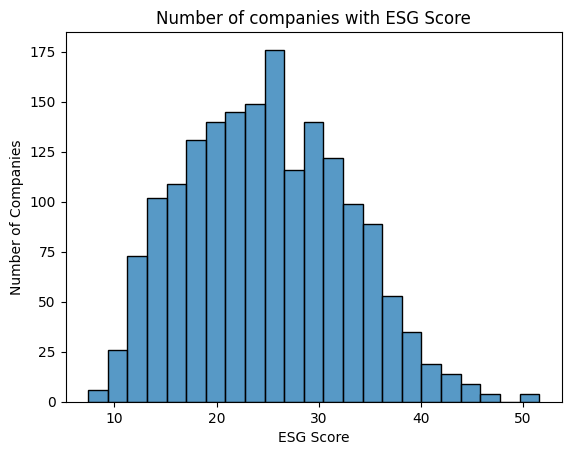

In [ ]:
sns.histplot(df.esgScore)
plt.title("Number of companies with ESG Score")
plt.ylabel("Number of Companies")
plt.xlabel("ESG Score")

<Axes: ylabel='esgScore'>

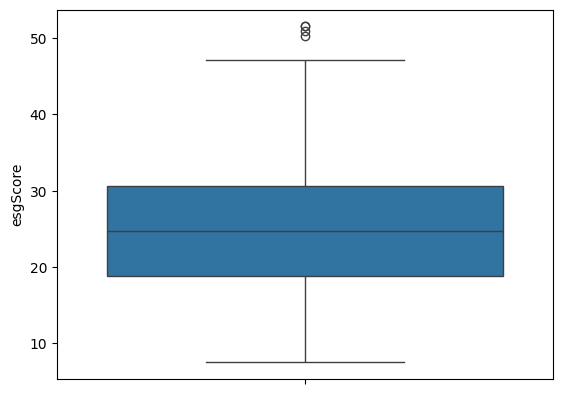

In [ ]:
sns.boxplot(df.esgScore)
#ESG score have outliers but will be retained as some companies might perform extremely well on their ESG

Text(0.5, 0, 'Year')

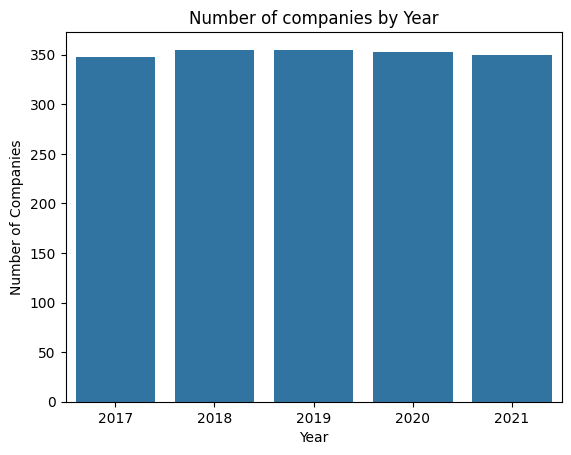

In [ ]:
sns.barplot(df.Year.value_counts())
plt.title("Number of companies by Year")
plt.ylabel("Number of Companies")
plt.xlabel("Year")

Text(0.5, 0, 'Industry Type')

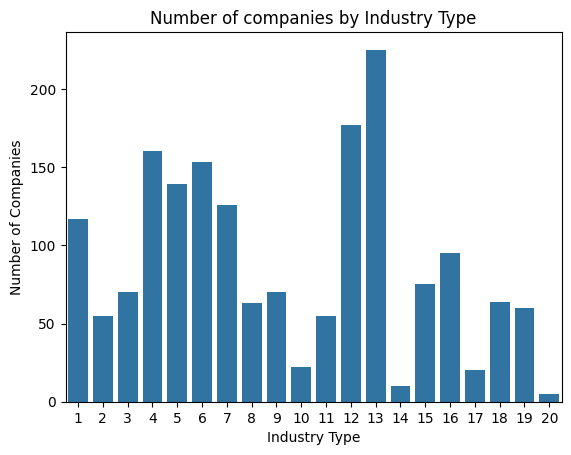

In [ ]:
sns.barplot(df.Industry_type.value_counts())
plt.title("Number of companies by Industry Type")
plt.ylabel("Number of Companies")
plt.xlabel("Industry Type")
#The number of industries does not match with the metadata, upon inspection, the industry does not match with the companies, thus should be removed later

Text(0.5, 0, 'SDG Target')

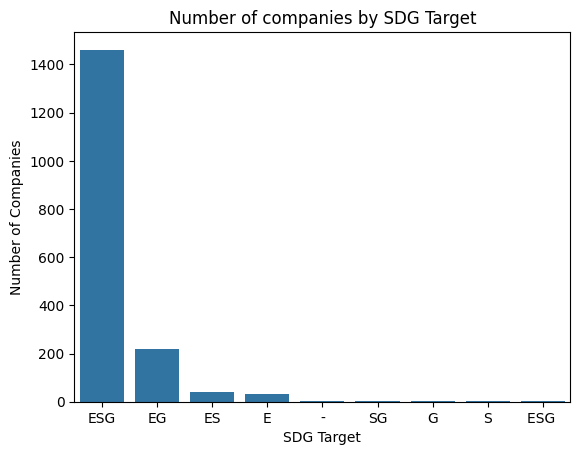

In [ ]:
sns.barplot(df.SDG_targets.value_counts())
plt.title("Number of companies by SDG Target")
plt.ylabel("Number of Companies")
plt.xlabel("SDG Target")

Text(0.5, 0, 'Amount of fine')

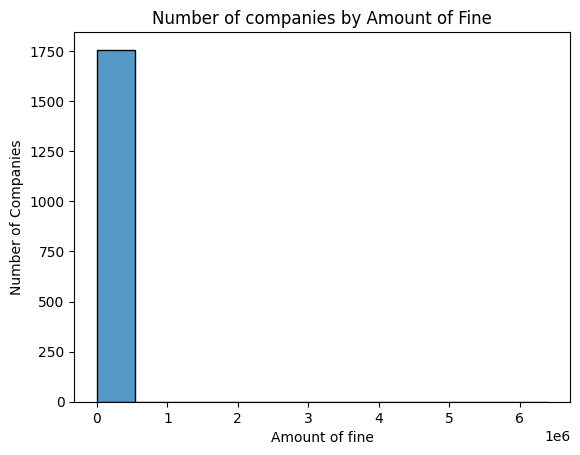

In [ ]:
sns.histplot(df.Amount_of_fines)
plt.title("Number of companies by Amount of Fine")
plt.ylabel("Number of Companies")
plt.xlabel("Amount of fine")

Text(0.5, 0, 'ESG Funds')

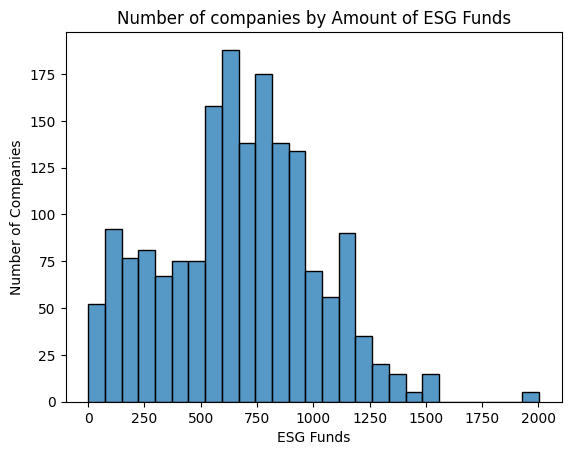

In [ ]:
#ESG funds
sns.histplot(df.ESG_funds)
plt.title("Number of companies by Amount of ESG Funds")
plt.ylabel("Number of Companies")
plt.xlabel("ESG Funds")

Text(0.5, 0, 'Controversy Level')

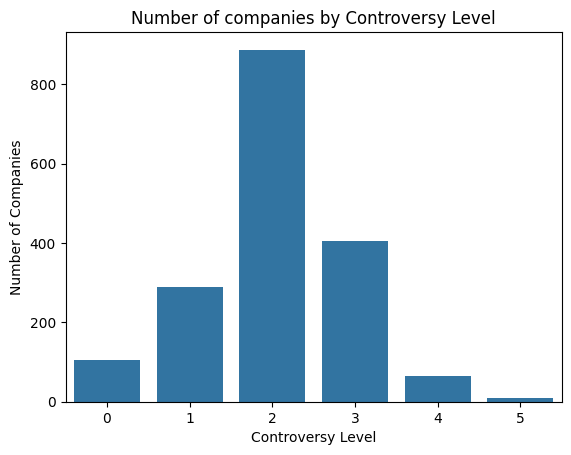

In [ ]:
#Controvery level
sns.barplot(df.Controversy_level.value_counts())
plt.title("Number of companies by Controversy Level")
plt.ylabel("Number of Companies")
plt.xlabel("Controversy Level")

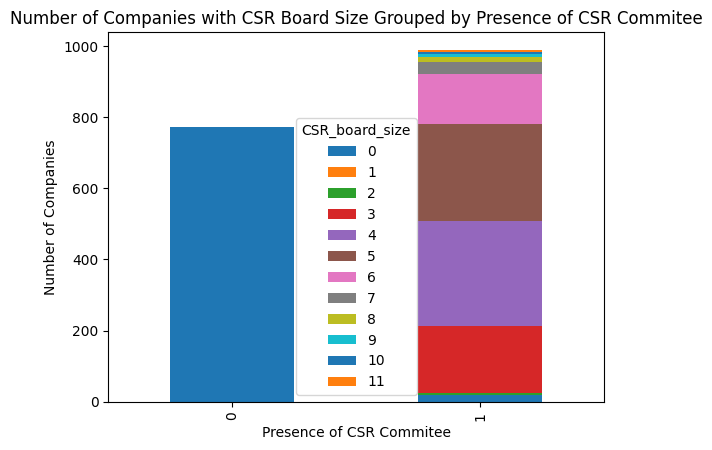

In [ ]:
df.groupby("CSR_commitee")["CSR_board_size"].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title("Number of Companies with CSR Board Size Grouped by Presence of CSR Commitee")
plt.ylabel("Number of Companies")
plt.xlabel("Presence of CSR Commitee")
plt.show()


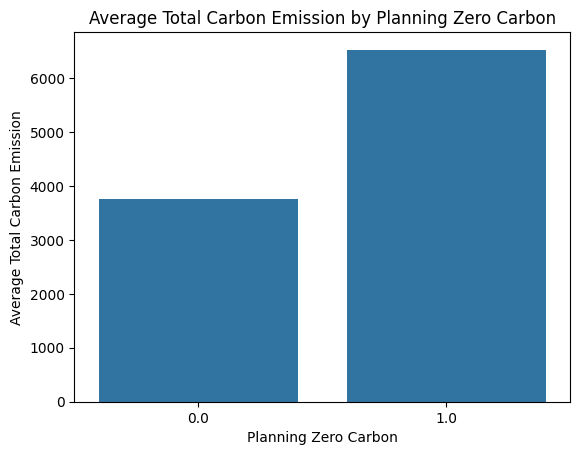

In [ ]:
sns.barplot(df.groupby("Planning_zero_carbon")["Total_carbon_emissions"].mean())
plt.title("Average Total Carbon Emission by Planning Zero Carbon")
plt.ylabel("Average Total Carbon Emission")
plt.xlabel("Planning Zero Carbon")
plt.show()
#Companies planning zero carbon actually release more carbon

# Data Preparation

In [ ]:
def remove_outlier(col):
  # finding the 1st quartile
  q1 = np.quantile(col, 0.25)

  # finding the 3rd quartile
  q3 = np.quantile(col, 0.75)
  med = np.median(col)

  # finding the iqr region
  iqr = q3-q1

  # finding upper and lower whiskers
  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)
  print(iqr, upper_bound, lower_bound)
  df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
  return df

In [ ]:
df=df[df.Year>=2020]
df['esgScore_binned'] = pd.cut(df['esgScore'], bins=5, labels=False)
df_train,df_test = train_test_split(df, test_size=0.2, stratify=df["esgScore_binned"],random_state=42)
##df_train=df[df.Year<2021]
# df_train=df[df.Year<=2020]
# df_test=df[df.Year==2021]
df_train.drop("esgScore_binned",axis=1,inplace=True)
df_test.drop("esgScore_binned",axis=1,inplace=True)
df_train

,Year,Company_name,SEC_code,Industry_type,CSR_commitee,CSR_board_size,Compliance_environmental_laws,EPA_fines,Amount_of_fines,SDG_targets,Issue_green_bonds,Govt_collaboration,Total_carbon_emissions,Direct_carbon_emissions,Indirect_carbon_emissions,Scope3_carbon_emissions,Environmental_scores,Disclosure_scores,Energy_conservation,Water_treatment,Recycling,Biodiversity,Waste_management,Green_innovation,GHG_sales,Net_zero_targets,Disclosure_of_R&D,Climate_change_policy,Renewal_energy,Dow_jones_sustainability_index,FTSE4Good_Index,MSCI_ESG_index,Global_reporting_initiative,Integrated_reporting_framework,Risk_score,Controversy_level,Planning_zero_carbon,ESG_funds,esgScore,governanceScore,environmentScore,socialScore
1750,2021,WEC Energy Group,WEC,4,0,0,0,0,0.0,ESG,1,1.0,0.00,0.00,0.00,0.00,65.75,69.11,1,1,0,1,1,0.0,3031.28,1,1,1,0,1,2.0,3,0,0.0,27.52,1,0.0,301,32.36,5.26,17.85,9.24
1719,2021,Texas Instruments,TXN,12,0,0,0,0,0.0,ESG,0,0.0,2302.78,1040.45,1262.33,2.12,62.70,69.93,1,1,1,1,1,1.0,147.83,0,0,1,0,1,2.0,3,1,0.0,19.93,2,0.0,1300,18.14,5.80,6.97,5.38
1250,2020,Kohl's,KSS,2,0,0,1,0,0.0,ESG,1,0.0,393.28,45.87,347.42,503.26,26.94,46.73,1,1,0,0,1,1.0,24.40,0,0,1,0,1,2.0,0,0,0.0,12.63,2,0.0,188,15.06,4.87,2.16,8.02
1392,2020,Visa,V,13,1,5,0,0,0.0,ESG,1,1.0,71.56,5.10,66.46,405.91,44.91,55.51,1,1,0,0,1,1.0,3.32,1,1,1,1,1,2.0,3,1,0.0,16.07,3,0.0,1522,18.00,7.62,0.11,10.28
1116,2020,BristolMyers Squibb,BMY,6,0,0,0,0,0.0,ESG,0,1.0,278.04,165.34,112.70,11.89,36.03,53.61,1,1,1,1,1,1.0,7.49,1,0,1,1,1,0.0,3,1,0.0,22.83,2,0.0,1166,28.10,10.98,1.37,15.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,2021,AECOM,ACM,9,1,5,1,0,0.0,ESG,0,1.0,73.49,0.00,0.00,2559.11,18.54,43.71,1,1,0,0,1,1.0,6.55,1,1,1,0,1,0.0,0,0,1.0,26.19,2,1.0,169,28.15,7.05,6.24,14.86
1323,2020,Polaris,PII,19,0,0,0,0,0.0,ESG,0,0.0,106.51,32.42,74.10,0.00,53.73,58.64,1,1,0,1,1,0.0,15.42,0,0,0,1,1,0.0,0,0,0.0,11.10,2,0.0,115,13.15,6.07,0.22,6.87
1562,2021,General Dynamics,GD,18,1,5,1,0,0.0,ESG,0,1.0,0.00,0.00,0.00,0.00,2.42,38.75,1,1,0,0,1,1.0,21.30,0,0,1,0,1,0.0,3,0,0.0,34.88,3,0.0,211,37.43,7.63,9.75,20.05
1166,2020,Dick's Sporting Goods,DKS,16,0,0,1,0,0.0,ESG,0,0.0,257.23,27.27,229.96,0.00,37.15,52.69,1,1,1,0,1,1.0,22.64,0,0,0,0,1,0.0,0,1,0.0,16.20,2,0.0,139,17.68,6.21,4.24,7.22


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 1750 to 1713
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            562 non-null    int64  
 1   Company_name                    562 non-null    object 
 2   SEC_code                        562 non-null    object 
 3   Industry_type                   562 non-null    int64  
 4   CSR_commitee                    562 non-null    int64  
 5   CSR_board_size                  562 non-null    int64  
 6   Compliance_environmental_laws   562 non-null    int64  
 7   EPA_fines                       562 non-null    int64  
 8   Amount_of_fines                 562 non-null    float64
 9   SDG_targets                     562 non-null    object 
 10  Issue_green_bonds               562 non-null    int64  
 11  Govt_collaboration              561 non-null    float64
 12  Total_carbon_emissions          562 n

In [ ]:
df_train.drop("Company_name",axis=1,inplace=True) #Already have SEC_code
df_train.drop(["Disclosure_scores","Risk_score","Environmental_scores","FTSE4Good_Index","Dow_jones_sustainability_index","MSCI_ESG_index"],axis=1,inplace=True) #Unused scores
df_test.drop("Company_name",axis=1,inplace=True) #Already have SEC_code
df_test.drop(["Disclosure_scores","Risk_score","Environmental_scores","FTSE4Good_Index","Dow_jones_sustainability_index","MSCI_ESG_index"],axis=1,inplace=True) #Unused scores

In [ ]:
#Columns with only one value by company
for col in df_train.columns:
  print(df_train.groupby("SEC_code")[col].nunique())
#GHG_sales, Net_zero_targets,Disclosure_of_R&D,DOw_jones_sustainability_index,MSCO_ESG_index,Risk_score,ESG_funds,Controversy_level

SEC_code
AA      1
AAL     1
AAPL    2
ABBV    1
ABC     2
       ..
XEL     1
XOM     1
YUM     2
ZBH     1
ZTS     1
Name: Year, Length: 334, dtype: int64
SEC_code
AA      1
AAL     1
AAPL    1
ABBV    1
ABC     1
       ..
XEL     1
XOM     1
YUM     1
ZBH     1
ZTS     1
Name: SEC_code, Length: 334, dtype: int64
SEC_code
AA      1
AAL     1
AAPL    1
ABBV    1
ABC     1
       ..
XEL     1
XOM     1
YUM     1
ZBH     1
ZTS     1
Name: Industry_type, Length: 334, dtype: int64
SEC_code
AA      1
AAL     1
AAPL    1
ABBV    1
ABC     1
       ..
XEL     1
XOM     1
YUM     1
ZBH     1
ZTS     1
Name: CSR_commitee, Length: 334, dtype: int64
SEC_code
AA      1
AAL     1
AAPL    1
ABBV    1
ABC     1
       ..
XEL     1
XOM     1
YUM     1
ZBH     1
ZTS     1
Name: CSR_board_size, Length: 334, dtype: int64
SEC_code
AA      1
AAL     1
AAPL    1
ABBV    1
ABC     1
       ..
XEL     1
XOM     1
YUM     1
ZBH     1
ZTS     1
Name: Compliance_environmental_laws, Length: 334, dtype: int64
SE

In [ ]:
df_train[(df_train.Integrated_reporting_framework.isnull()) | (df_train.Govt_collaboration.isnull()) | (df_train.Planning_zero_carbon.isnull())]

,Year,SEC_code,Industry_type,CSR_commitee,CSR_board_size,Compliance_environmental_laws,EPA_fines,Amount_of_fines,SDG_targets,Issue_green_bonds,Govt_collaboration,Total_carbon_emissions,Direct_carbon_emissions,Indirect_carbon_emissions,Scope3_carbon_emissions,Energy_conservation,Water_treatment,Recycling,Biodiversity,Waste_management,Green_innovation,GHG_sales,Net_zero_targets,Disclosure_of_R&D,Climate_change_policy,Renewal_energy,Global_reporting_initiative,Integrated_reporting_framework,Controversy_level,Planning_zero_carbon,ESG_funds,esgScore,governanceScore,environmentScore,socialScore
1600,2021,K,5,1,5,0,0,0.0,ES,0,NaN,0.0,0.0,0.0,0.0,1,1,1,1,1,1.0,88.39,0,0,1,1,1,0.0,2,0.0,879,26.91,4.63,7.45,14.83


In [ ]:
df_train.Govt_collaboration.fillna(df_train[df_train.SEC_code=="MOS"].Govt_collaboration.mode()[0],inplace=True)
df_train[df_train.SEC_code=="MOS"]

,Year,SEC_code,Industry_type,CSR_commitee,CSR_board_size,Compliance_environmental_laws,EPA_fines,Amount_of_fines,SDG_targets,Issue_green_bonds,Govt_collaboration,Total_carbon_emissions,Direct_carbon_emissions,Indirect_carbon_emissions,Scope3_carbon_emissions,Energy_conservation,Water_treatment,Recycling,Biodiversity,Waste_management,Green_innovation,GHG_sales,Net_zero_targets,Disclosure_of_R&D,Climate_change_policy,Renewal_energy,Global_reporting_initiative,Integrated_reporting_framework,Controversy_level,Planning_zero_carbon,ESG_funds,esgScore,governanceScore,environmentScore,socialScore
1640,2021,MOS,3,0,0,1,0,0.0,ESG,0,0.0,0.00,0.00,0.00,0.00,1,1,0,1,1,1.0,766.84,0,0,1,0,1,0.0,2,0.0,699,35.22,8.40,14.91,11.92
1285,2020,MOS,3,1,6,1,0,0.0,ESG,0,0.0,4919.99,3437.84,1482.15,8954.15,1,1,0,1,1,1.0,766.84,0,0,1,0,1,0.0,2,0.0,699,36.50,8.63,16.04,11.83


In [ ]:
# df_train.Planning_zero_carbon.fillna(df_train[df_train.SEC_code=="HPG"].Planning_zero_carbon.mode()[0],inplace=True)
# df_train[df_train.SEC_code=="HPG"]

In [ ]:
df_train.Integrated_reporting_framework.fillna(df_train[df_train.SEC_code=="SRE"].Integrated_reporting_framework.mode()[0],inplace=True)
df_train[df_train.SEC_code=="SRE"]

,Year,SEC_code,Industry_type,CSR_commitee,CSR_board_size,Compliance_environmental_laws,EPA_fines,Amount_of_fines,SDG_targets,Issue_green_bonds,Govt_collaboration,Total_carbon_emissions,Direct_carbon_emissions,Indirect_carbon_emissions,Scope3_carbon_emissions,Energy_conservation,Water_treatment,Recycling,Biodiversity,Waste_management,Green_innovation,GHG_sales,Net_zero_targets,Disclosure_of_R&D,Climate_change_policy,Renewal_energy,Global_reporting_initiative,Integrated_reporting_framework,Controversy_level,Planning_zero_carbon,ESG_funds,esgScore,governanceScore,environmentScore,socialScore
1704,2021,SRE,4,1,6,0,1,1100.0,ESG,1,0.0,7176.0,6800.0,376.0,66200.0,1,1,0,1,1,0.0,657.28,1,0,1,1,1,0.0,3,1.0,680,30.1,5.6,14.42,10.08


In [ ]:
df_test.dropna(inplace=True)

In [ ]:
df_train["E"]=df_train["SDG_targets"].str.contains("E")
df_train["E"]=df_train["E"].astype(int)
df_train["S"]=df_train["SDG_targets"].str.contains("S")
df_train["S"]=df_train["S"].astype(int)
df_train["G"]=df_train["SDG_targets"].str.contains("G")
df_train["G"]=df_train["G"].astype(int)
df_train.drop("SDG_targets",axis=1,inplace=True)
df_test["E"]=df_test["SDG_targets"].str.contains("E")
df_test["E"]=df_test["E"].astype(int)
df_test["S"]=df_test["SDG_targets"].str.contains("S")
df_test["S"]=df_test["S"].astype(int)
df_test["G"]=df_test["SDG_targets"].str.contains("G")
df_test["G"]=df_test["G"].astype(int)
df_test.drop("SDG_targets",axis=1,inplace=True)

In [ ]:
df_train.drop(["SEC_code","Industry_type"],axis=1,inplace=True) #Drop SEC_code which is identifier and industry type as they are inaccurate
df_test.drop(["SEC_code","Industry_type"],axis=1,inplace=True)

In [ ]:
df_train.describe()

,Year,CSR_commitee,CSR_board_size,Compliance_environmental_laws,EPA_fines,Amount_of_fines,Issue_green_bonds,Govt_collaboration,Total_carbon_emissions,Direct_carbon_emissions,Indirect_carbon_emissions,Scope3_carbon_emissions,Energy_conservation,Water_treatment,Recycling,Biodiversity,Waste_management,Green_innovation,GHG_sales,Net_zero_targets,Disclosure_of_R&D,Climate_change_policy,Renewal_energy,Global_reporting_initiative,Integrated_reporting_framework,Controversy_level,Planning_zero_carbon,ESG_funds,esgScore,governanceScore,environmentScore,socialScore,E,S,G
count,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,2020.501779,0.695730,3.188612,0.268683,0.051601,7.240977e+03,0.113879,0.403915,2919.742313,2233.725641,523.374982,10970.724840,0.964413,0.836299,0.379004,0.469751,0.911032,0.588968,294.635427,0.434164,0.320285,0.784698,0.366548,0.642349,0.094306,2.037367,0.160142,681.322064,23.799448,7.283541,5.975267,10.198541,0.998221,0.946619,0.955516
std,0.500442,0.460508,2.447308,0.443670,0.221418,1.509322e+05,0.317947,0.491118,8740.954830,7189.229651,1700.229102,50503.054221,0.185424,0.370334,0.485571,0.499529,0.284951,0.492459,815.425082,0.496088,0.467002,0.411398,0.482291,0.479736,0.337765,0.917463,0.367065,339.175525,7.619426,2.851553,5.605366,4.021731,0.042182,0.224992,0.206351
min,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.667500,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,478.250000,18.012500,5.412500,1.552500,7.760000,1.000000,1.000000,1.000000
50%,2021.000000,1.000000,4.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,106.950000,18.645000,57.950000,3.585000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,24.730000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,680.000000,23.150000,6.585000,3.880000,9.900000,1.000000,1.000000,1.000000
75%,2021.000000,1.000000,5.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,864.132500,333.735000,364.350000,2938.357500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,94.812500,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,916.000000,29.220000,8.470000,9.365000,12.595000,1.000000,1.000000,1.000000
max,2021.000000,1.000000,11.000000,1.000000,1.000000,3.561250e+06,1.000000,1.000000,75368.900000,56401.100000,29851.300000,757353.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5424.030000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,1.000000,2003.000000,51.580000,17.780000,24.840000,26.870000,1.000000,1.000000,1.000000


In [ ]:
high_vif_cols=["Year","E","Energy_conservation","G","CSR_commitee","Waste_management","S"] #drop columns which causes high VIF
cols=["esgScore","governanceScore","environmentScore","socialScore"]+high_vif_cols
vif = pd.DataFrame()
vif['features'] = df_train.drop(cols,axis=1).columns
vif['vif_value'] = [variance_inflation_factor(df_train.drop(cols,axis=1).values, i) for i in range(df_train.drop(cols,axis=1).shape[1])]
df_train.drop(high_vif_cols,axis=1,inplace=True)
df_test.drop(high_vif_cols,axis=1,inplace=True)
vif.sort_values(by="vif_value", ascending=False)


,features,vif_value
10,Water_treatment,6.656002
21,Controversy_level,6.295612
23,ESG_funds,6.132248
6,Total_carbon_emissions,5.811201
17,Climate_change_policy,5.430446
7,Direct_carbon_emissions,4.071463
19,Global_reporting_initiative,3.707430
0,CSR_board_size,3.003196
14,GHG_sales,2.887594
13,Green_innovation,2.880438


In [ ]:
cat_cols=["CSR_commitee","Compliance_environmental_laws","EPA_fines","Issue_green_bonds","Govt_collaboration","Energy_conservation", \
           "Water_treatment","Recycling","Biodiversity","Waste_management","Green_innovation","E","S","G", \
           "Net_zero_targets","Disclosure_of_R&D","Climate_change_policy","Renewal_energy","Global_reporting_initiative","Planning_zero_carbon"]
for col in cat_cols:
  if col in df_train.columns:
    df_train[col]=df_train[col].astype(bool)
  if col in df_test.columns:
    df_test[col]=df_test[col].astype(bool)
#   df_train[col]=df_train[col].replace({0:-1})
#   df_test[col]=df_test[col].replace({0:-1})

<Axes: >

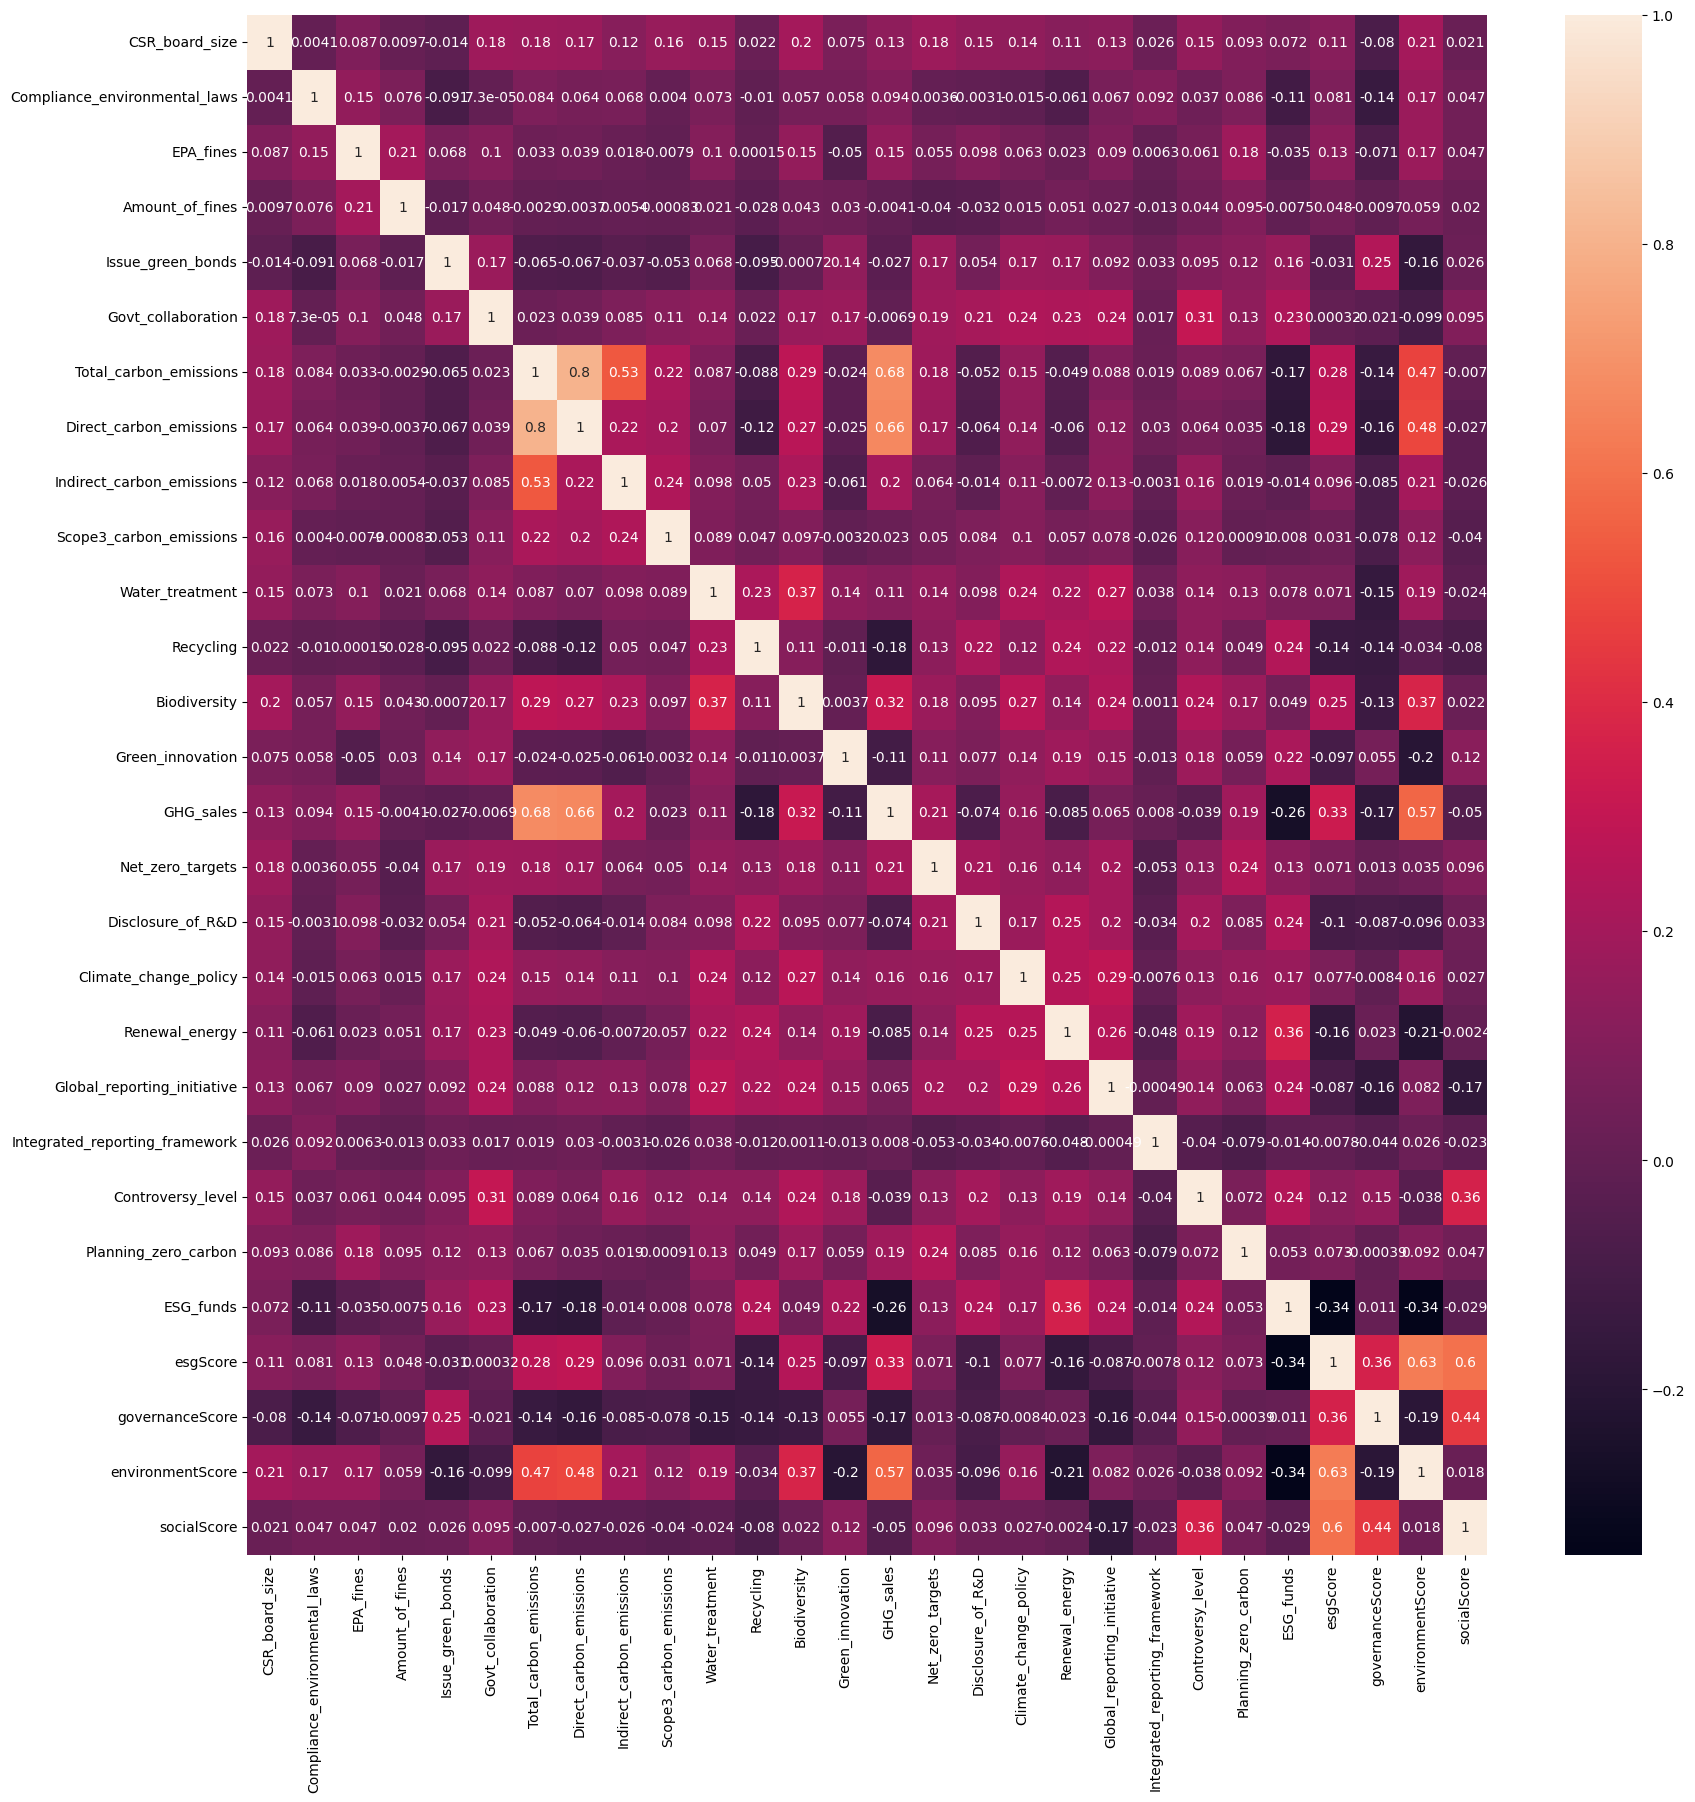

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_train.corr(),ax=ax,annot=True)

#Data Modelling
TODO: try reducing test ratio to 0.1

In [ ]:
#SMOTE leads to worse performance
# df_train['esgScore_binned'] = pd.cut(df_train['esgScore'], bins=5, labels=False)
# smote = SMOTE(random_state=42)
# df_train, _ = smote.fit_resample(df_train.drop("esgScore_binned",axis=1), df_train['esgScore_binned'])
# df_train

In [ ]:
def split_data(target, prod=False):
  cols=["esgScore","governanceScore","environmentScore","socialScore"]
  sampled_df_train=df_train.copy()
  # sampled_df_train[target+'_binned'] = pd.cut(sampled_df_train[target], bins=5, labels=False)
  # smote = SMOTE(random_state=42)
  # sampled_df_train, _ = smote.fit_resample(sampled_df_train.drop(target+"_binned",axis=1), sampled_df_train[target+'_binned'])
  X_train, y_train = sampled_df_train.drop(cols,axis=1), sampled_df_train[target] #Risk rating(sustainalytics)
  X_test, y_test = df_test.drop(cols,axis=1), df_test[target]
  # prod_features=['Water_treatment', 'GHG_sales', 'Biodiversity',
  #      'Global_reporting_initiative', 'Climate_change_policy',
  #      'Govt_collaboration', 'Recycling', 'ESG_funds', 'Disclosure_of_R&D',
  #      'EPA_fines', 'Waste_management', 'Controversy_level',
  #      'Integrated_reporting_framework', 'Indirect_carbon_emissions',
  #      'Planning_zero_carbon', 'Green_innovation', 'S', 'CSR_board_size',
  #      'Net_zero_targets', 'Issue_green_bonds', 'Scope3_carbon_emissions']
  # if prod:
  #   X_train=X_train[prod_features]
  #   X_test=X_test[prod_features]
  return X_train, y_train, X_test,y_test

def train_model(type, model, res, model_dict,k=25,prod=False):
  print(type, ",", model)
  if type=="E":
    X_train, y_train, X_test,y_test = split_data("environmentScore",prod)
  elif type=="S":
    X_train, y_train, X_test,y_test = split_data("socialScore",prod)
  elif type=="G":
    X_train, y_train, X_test,y_test = split_data("governanceScore",prod)

  if model==LinearRegression:
    param_grid = {
        'rfe__n_features_to_select':[15,20,25]
        }
  elif model==Lasso:
    param_grid = {
        'rfe__n_features_to_select':[15,20,25],
        'estimator__max_iter': [1000], #increase doesnt help
        'estimator__alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
        }
  elif model==Ridge:
    param_grid = {
        'rfe__n_features_to_select':[15,20,25],
        'estimator__max_iter': [1000],
        'estimator__alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
        }
  elif model==RandomForestRegressor:
    param_grid = {
        'rfe__n_features_to_select': [25],
        'estimator__n_estimators': [100, 200],
        'estimator__max_depth' : [4,6]
    }
  elif model==XGBRegressor:
    param_grid = {
        'rfe__n_features_to_select': [25],
        'estimator__learning_rate': [0.01, 0.1],
        'estimator__n_estimators': [100, 500],
        'estimator__max_depth': [3, 5]
    }

  # if model in [LinearRegression,Lasso,Ridge]:
  #   fs = SelectKBest(score_func=f_regression, k=k)
  #   # apply feature selection
  #   fs.fit(X_train, y_train)
  #   cols_idxs = fs.get_support(indices=True)
  #   X_train = X_train.iloc[:,cols_idxs]

  #if prod: param_grid['rfe__n_features_to_select']=[15]

  num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
  bool_cols = X_train.select_dtypes(include=['bool']).columns.tolist()

  num_categorical_transformer = Pipeline(steps=[
      ('num', StandardScaler())
  ])

  # Bundle preprocessing for numerical and categorical data
  preprocessor = ColumnTransformer(
      transformers=[
          ('scaling',num_categorical_transformer, num_cols),
          ('passthrough','passthrough',bool_cols)
      ])

  pipeline = Pipeline([
      ('preprocessor',preprocessor),
      #('polynomial',PolynomialFeatures(2)),
      ('rfe',RFE(estimator=model())),
      ("estimator", model())
  ])

  grid_search = GridSearchCV(pipeline, param_grid, cv=KFold(n_splits=5), scoring='neg_root_mean_squared_error')
  grid_search.fit(X_train, y_train)

  best_model=grid_search.best_estimator_
  model_dict[model]=best_model
  print("Best Parameters:", grid_search.best_params_)

  # y_pred = best_model.predict(X_train)
  # print("Training RMSE: ",mean_squared_error(y_train,y_pred,squared=False))
  # R2=r2_score(y_train, y_pred)
  # print("Training R2 score :", R2)

  if prod: return
  # Make predictions on the test set
  y_pred = best_model.predict(X_test)
  res[model]=y_pred
  print("RMSE: ",mean_squared_error(y_test,y_pred,squared=False))
  R2=r2_score(y_test, y_pred)
  print("R2 score :", R2)
  n = len(X_train)
  p = len(X_train.columns)
  adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1))
  print("Adjusted R2 score :", adj_R2)
  plt.scatter(y_pred, y_test)
  plt.plot(np.linspace(0,30), np.linspace(0,30), c = 'orange', linestyle='--')
  plt.xlabel('prediction')
  plt.ylabel('true values')
  plt.xlim(0,30)
  plt.ylim(0,30)
  plt.title('Predicted vs True values')
  plt.show()

E , <class 'sklearn.linear_model._base.LinearRegression'>
Best Parameters: {'rfe__n_features_to_select': 20}
RMSE:  4.083317671877288
R2 score : 0.42881627633931896
Adjusted R2 score : 0.4032885121533667


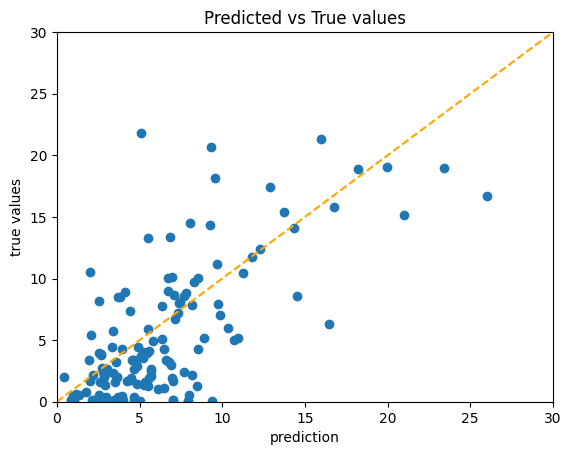

E , <class 'sklearn.linear_model._coordinate_descent.Lasso'>
Best Parameters: {'estimator__alpha': 0.01, 'estimator__max_iter': 1000, 'rfe__n_features_to_select': 20}
RMSE:  4.068508698915761
R2 score : 0.43295178893501896
Adjusted R2 score : 0.4076088521276455


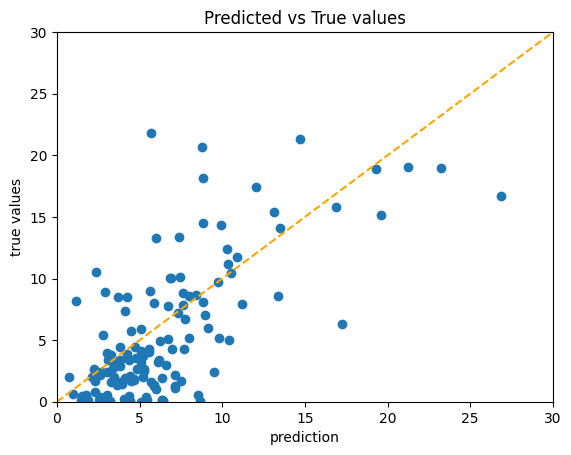

E , <class 'sklearn.linear_model._ridge.Ridge'>
Best Parameters: {'estimator__alpha': 20, 'estimator__max_iter': 1000, 'rfe__n_features_to_select': 20}
RMSE:  4.021359109005831
R2 score : 0.4460185765347311
Adjusted R2 score : 0.42125963023460733


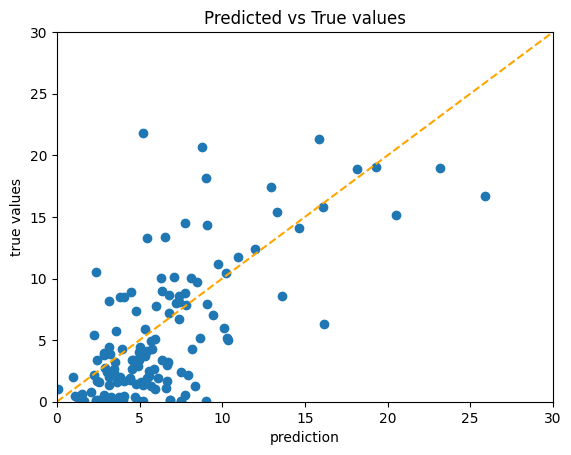

E , <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Best Parameters: {'estimator__max_depth': 6, 'estimator__n_estimators': 100, 'rfe__n_features_to_select': 25}
RMSE:  2.38362759342244
R2 score : 0.805362599630411
Adjusted R2 score : 0.7966637214016026


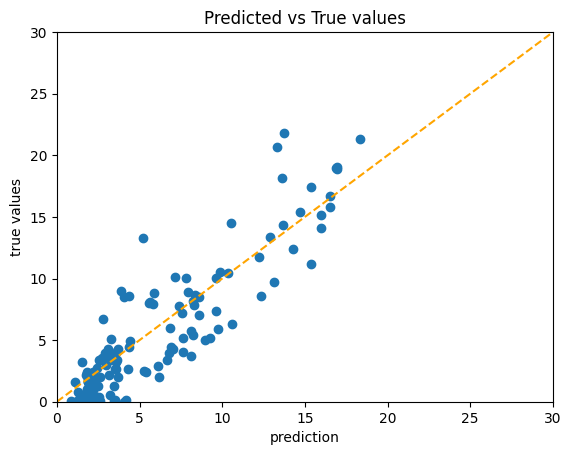

E , <class 'xgboost.sklearn.XGBRegressor'>
Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 500, 'rfe__n_features_to_select': 25}
RMSE:  1.9246384398055827
R2 score : 0.8731040393611662
Adjusted R2 score : 0.8674327115113859


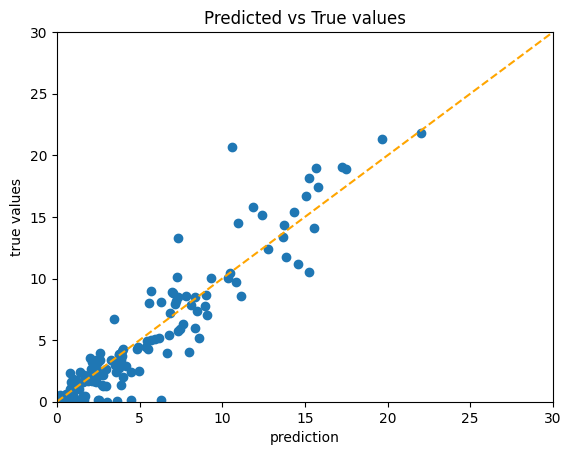

In [ ]:
y_pred_e={}
model_e={}
train_model("E",LinearRegression,y_pred_e,model_e)
train_model("E",Lasso,y_pred_e,model_e)
train_model("E",Ridge,y_pred_e,model_e)
train_model("E",RandomForestRegressor,y_pred_e,model_e)
train_model("E",XGBRegressor,y_pred_e,model_e)


S , <class 'sklearn.linear_model._base.LinearRegression'>
Best Parameters: {'rfe__n_features_to_select': 15}
RMSE:  3.9126944891252813
R2 score : 0.031759813762103906
Adjusted R2 score : -0.011513490650763014


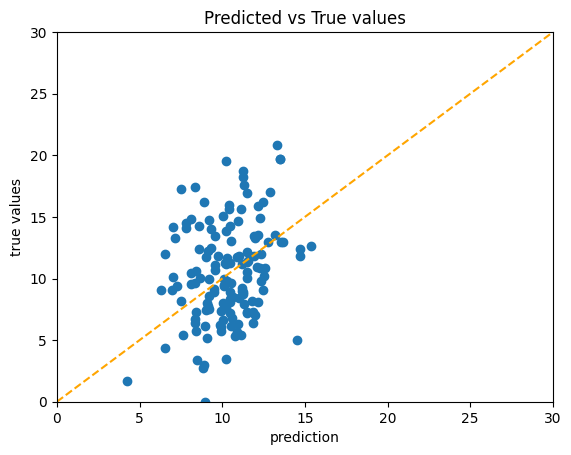

S , <class 'sklearn.linear_model._coordinate_descent.Lasso'>
Best Parameters: {'estimator__alpha': 0.01, 'estimator__max_iter': 1000, 'rfe__n_features_to_select': 15}
RMSE:  3.841068275633395
R2 score : 0.06688476487789363
Adjusted R2 score : 0.025181290682492308


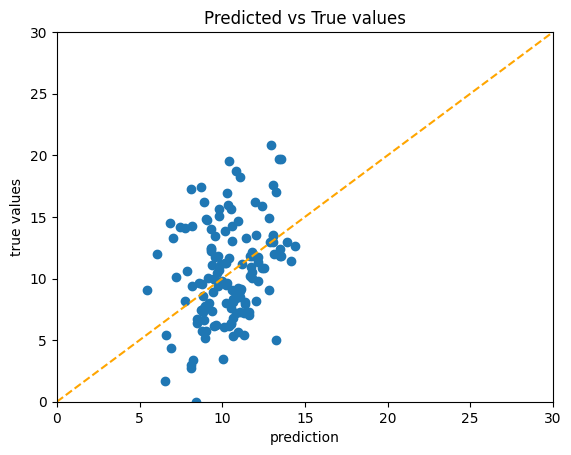

S , <class 'sklearn.linear_model._ridge.Ridge'>
Best Parameters: {'estimator__alpha': 20, 'estimator__max_iter': 1000, 'rfe__n_features_to_select': 15}
RMSE:  3.8501482774241276
R2 score : 0.06246791945803798
Adjusted R2 score : 0.020567044350017327


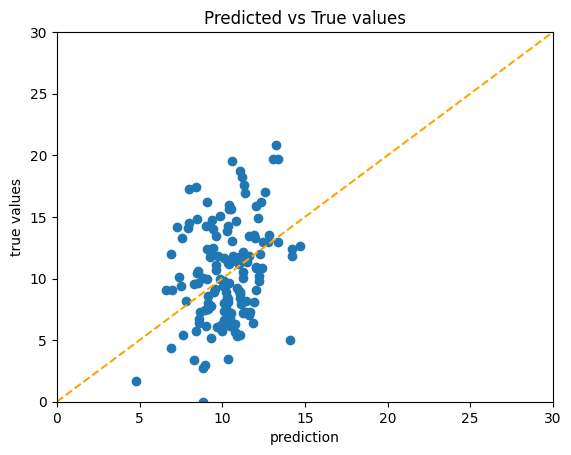

S , <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Best Parameters: {'estimator__max_depth': 6, 'estimator__n_estimators': 200, 'rfe__n_features_to_select': 25}
RMSE:  3.3946140370809452
R2 score : 0.2711938445848203
Adjusted R2 score : 0.23862150244335978


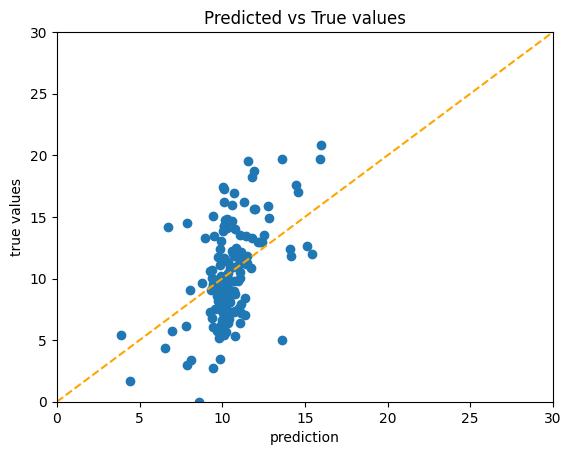

S , <class 'xgboost.sklearn.XGBRegressor'>
Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 500, 'rfe__n_features_to_select': 25}
RMSE:  2.481340385400028
R2 score : 0.6105928561864016
Adjusted R2 score : 0.5931891849545089


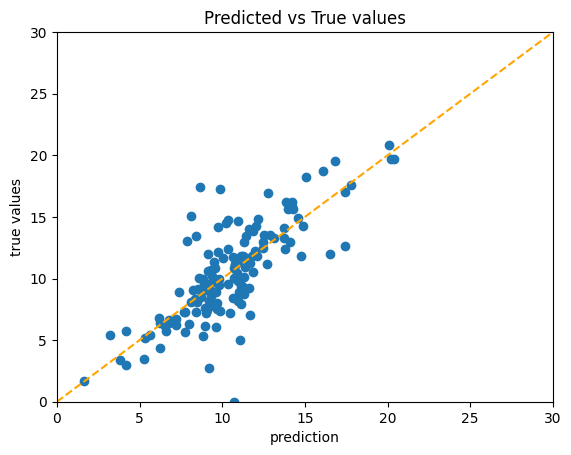

In [ ]:
y_pred_s={}
model_s={}
train_model("S",LinearRegression,y_pred_s,model_s)
train_model("S",Lasso,y_pred_s,model_s)
train_model("S",Ridge,y_pred_s,model_s)
train_model("S",RandomForestRegressor,y_pred_s,model_s)
train_model("S",XGBRegressor,y_pred_s,model_s)

G , <class 'sklearn.linear_model._base.LinearRegression'>
Best Parameters: {'rfe__n_features_to_select': 15}
RMSE:  2.8405131080452817
R2 score : 0.07647618571809445
Adjusted R2 score : 0.03520137837588644


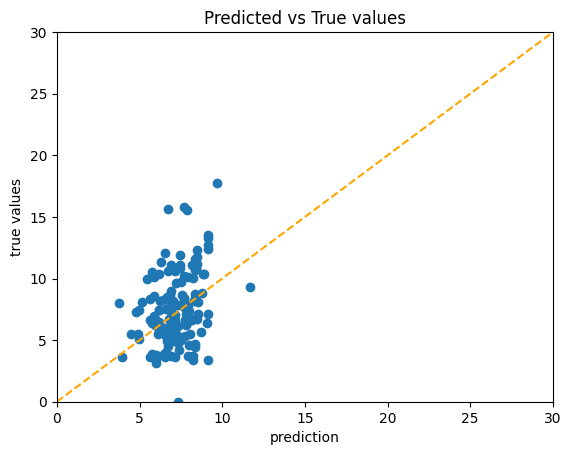

G , <class 'sklearn.linear_model._coordinate_descent.Lasso'>
Best Parameters: {'estimator__alpha': 0.01, 'estimator__max_iter': 1000, 'rfe__n_features_to_select': 20}
RMSE:  2.8319478027703373
R2 score : 0.082037390164438
Adjusted R2 score : 0.041011128272345876


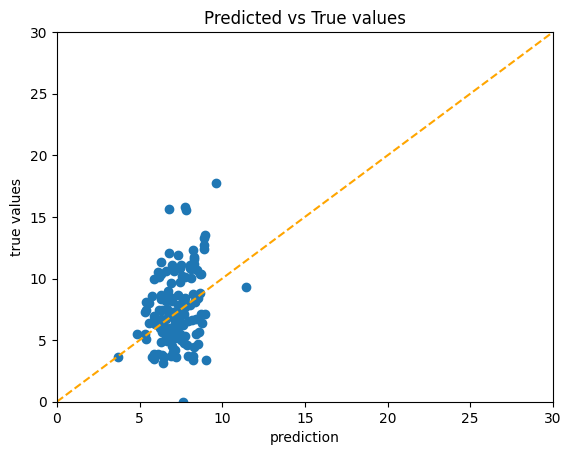

G , <class 'sklearn.linear_model._ridge.Ridge'>
Best Parameters: {'estimator__alpha': 20, 'estimator__max_iter': 1000, 'rfe__n_features_to_select': 15}
RMSE:  2.8393958708617784
R2 score : 0.0772025278907239
Adjusted R2 score : 0.03596018276852164


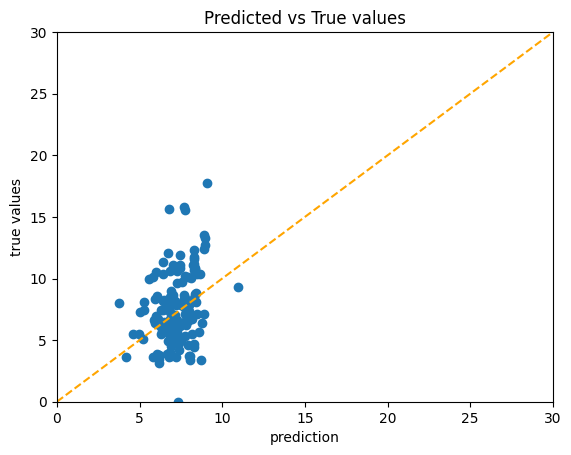

G , <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Best Parameters: {'estimator__max_depth': 6, 'estimator__n_estimators': 200, 'rfe__n_features_to_select': 25}
RMSE:  2.3955990582511517
R2 score : 0.3431249436110152
Adjusted R2 score : 0.31376739919139585


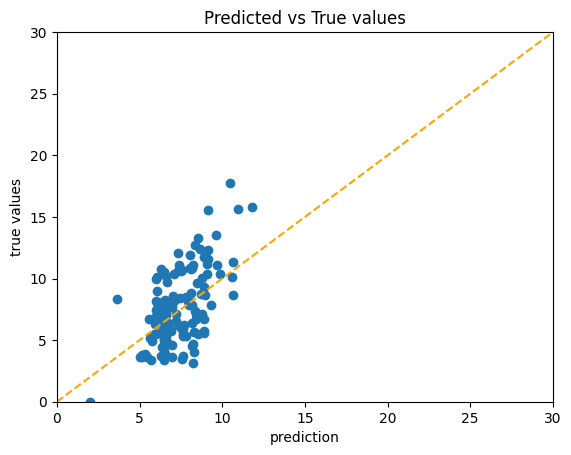

G , <class 'xgboost.sklearn.XGBRegressor'>
Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 500, 'rfe__n_features_to_select': 25}
RMSE:  2.0484457267324285
R2 score : 0.5197101297914228
Adjusted R2 score : 0.4982446607318217


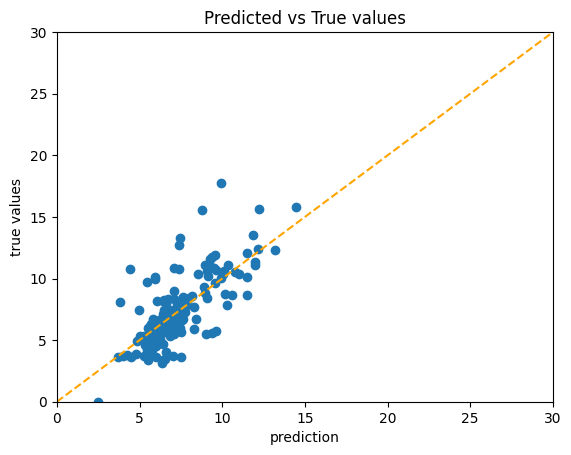

In [ ]:
y_pred_g={}
model_g={}
train_model("G",LinearRegression,y_pred_g,model_g)
train_model("G",Lasso,y_pred_g,model_g)
train_model("G",Ridge,y_pred_g,model_g)
train_model("G",RandomForestRegressor,y_pred_g,model_g)
train_model("G",XGBRegressor,y_pred_g,model_g)

# Model Interpretation

In [ ]:
def evaluate_model(model):
  X_train, y_train, X_test,y_test = split_data("esgScore")
  X_test["governanceScore"]=y_pred_g[model]
  X_test["environmentScore"]=y_pred_e[model]
  X_test["socialScore"]=y_pred_s[model]

  X_test["predictedEsg"]=X_test["governanceScore"]+X_test["environmentScore"]+X_test["socialScore"]
  print(model)
  print("RMSE :", mean_squared_error(y_test,X_test["predictedEsg"],squared=False))
  print("R2 score :", r2_score(y_test, X_test["predictedEsg"]))

def shap_plot(type,model):
  if type=="E":
    pipeline=model_e
    X_train, y_train, X_test,y_test = split_data("environmentScore")
  elif type=="S":
    pipeline=model_s
    X_train, y_train, X_test,y_test = split_data("socialScore")
  elif type=="G":
    pipeline=model_g
    X_train, y_train, X_test,y_test = split_data("governanceScore")
  X_train_transformed=pipeline[XGBRegressor][:-1].transform(X_train)
  if model=="XGB":
    explainer = shap.Explainer(pipeline[XGBRegressor][-1])
  else:
    explainer = shap.TreeExplainer(pipeline[RandomForestRegressor][-1])
  shap_values = explainer(X_train_transformed)
  shap.summary_plot(shap_values, X_train_transformed, feature_names=model_e[XGBRegressor][:-1].get_feature_names_out())

def pdp_plot(type,model):
  if type=="E":
    pipeline=model_e
    X_train, y_train, X_test,y_test = split_data("environmentScore")
  elif type=="S":
    pipeline=model_s
    X_train, y_train, X_test,y_test = split_data("socialScore")
  elif type=="G":
    pipeline=model_g
    X_train, y_train, X_test,y_test = split_data("governanceScore")
  common_params = {
      "subsample": 50,
      "n_jobs": 2,
      "grid_resolution": 20,
      "random_state": 0,
      "percentiles":(0, 1)
  }
  print("Computing partial dependence plots...")
  features_info = {
      # features of interest
      "features": X_train.columns,
      # type of partial dependence plot
      "kind": "average", #cannot use ICE as there are categorical features
      # information regarding categorical features
      "categorical_features": categorical_features
  }
  _, ax = plt.subplots(ncols=6, nrows=4, figsize=(30,30), constrained_layout=True)
  display = PartialDependenceDisplay.from_estimator(
      pipeline[model],
      X_train,
      **features_info,
      ax=ax,
      **common_params,
  )
  _ = display.figure_.suptitle(
      (
          f"Partial dependence of {type} Score"
      ),
      fontsize=16,
)

In [ ]:
evaluate_model(LinearRegression)
evaluate_model(Lasso)
evaluate_model(Ridge)
evaluate_model(RandomForestRegressor)
evaluate_model(XGBRegressor)
# <class 'sklearn.linear_model._base.LinearRegression'>
# RMSE : 6.852692651287824
# R2 score : 0.2460712684831453
# <class 'sklearn.linear_model._coordinate_descent.Lasso'>
# RMSE : 6.7208221429846935
# R2 score : 0.27480868928584834
# <class 'sklearn.linear_model._ridge.Ridge'>
# RMSE : 6.795444376522419
# R2 score : 0.25861548565305137
# <class 'sklearn.ensemble._forest.RandomForestRegressor'>
# RMSE : 5.6184682402530886
# R2 score : 0.49319178358491067
# <class 'xgboost.sklearn.XGBRegressor'>
# RMSE : 4.348778055747892
# R2 score : 0.6963716820034149

<class 'sklearn.linear_model._base.LinearRegression'>
RMSE : 6.852692651287824
R2 score : 0.2460712684831453
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
RMSE : 6.7208221429846935
R2 score : 0.27480868928584834
<class 'sklearn.linear_model._ridge.Ridge'>
RMSE : 6.795444376522419
R2 score : 0.25861548565305137
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
RMSE : 5.6390993336906305
R2 score : 0.4894629363181635
<class 'xgboost.sklearn.XGBRegressor'>
RMSE : 4.348778055747892
R2 score : 0.6963716820034149


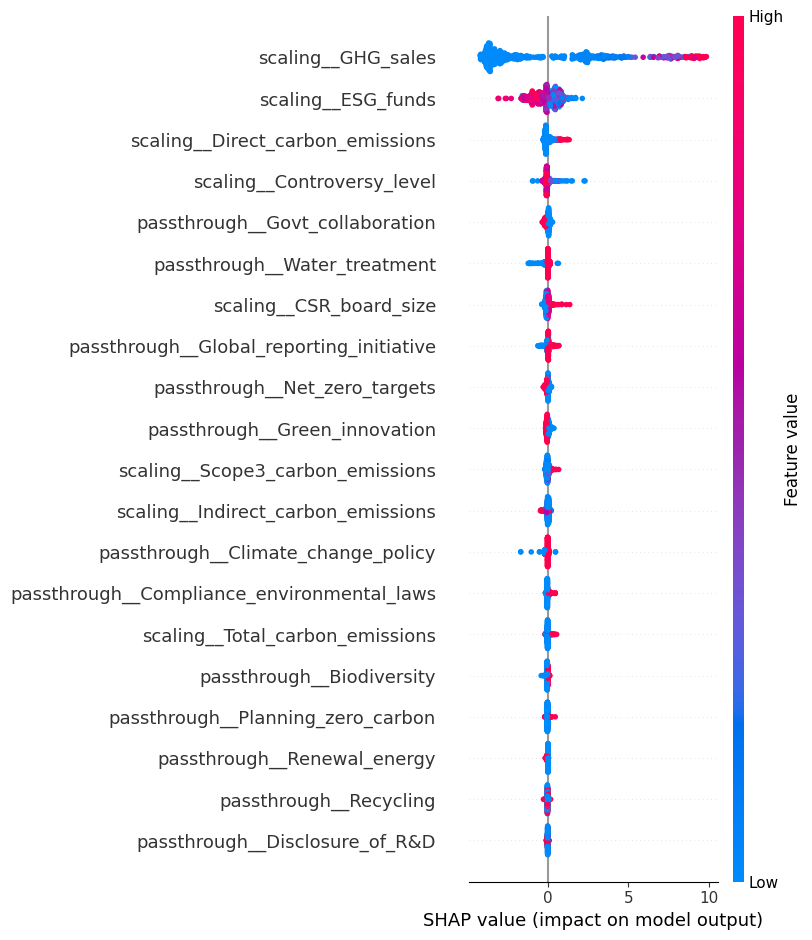

In [ ]:
shap_plot("E",XGBRegressor)

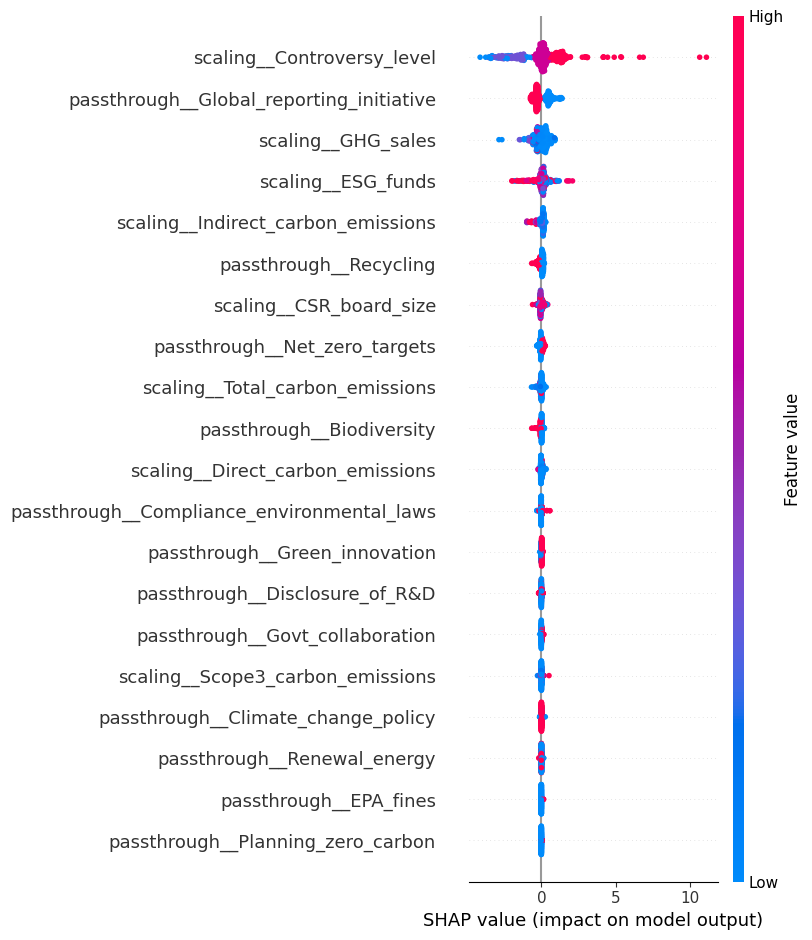

In [ ]:
shap_plot("S",XGBRegressor)

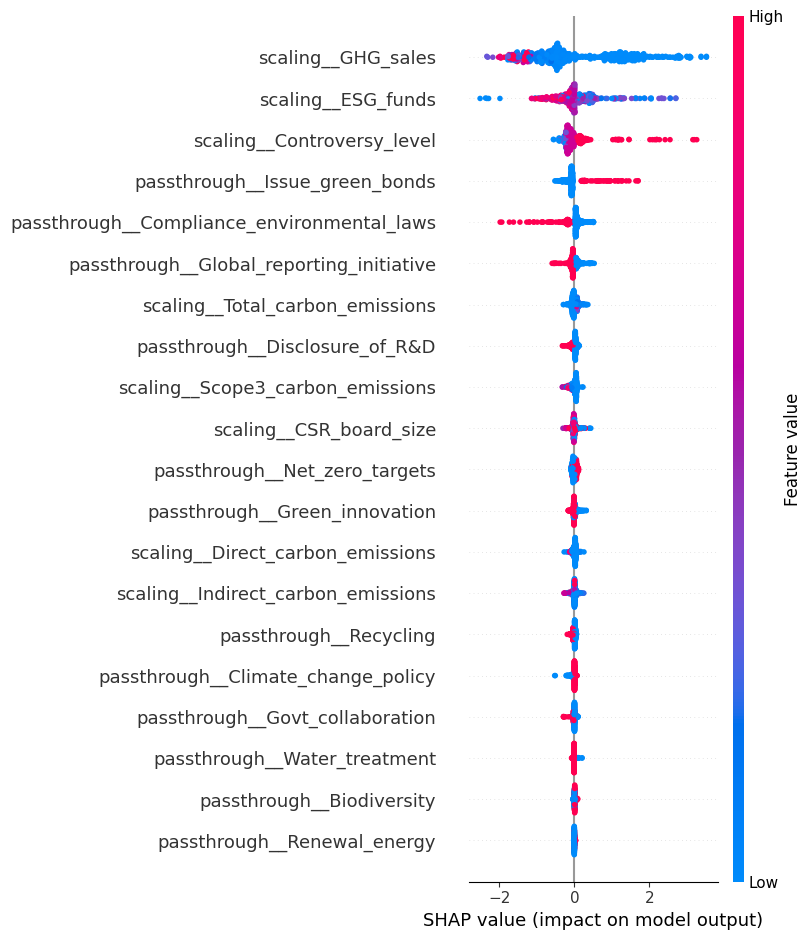

In [ ]:
shap_plot("G",XGBRegressor)

In [ ]:
categorical_features = ["CSR_board_size","Compliance_environmental_laws","EPA_fines","Issue_green_bonds","Govt_collaboration","Water_treatment","Recycling","Biodiversity","Green_innovation",\
                        "Net_zero_targets","Disclosure_of_R&D","Climate_change_policy","Renewal_energy","Global_reporting_initiative","Integrated_reporting_framework","Controversy_level","Planning_zero_carbon"]


Computing partial dependence plots...


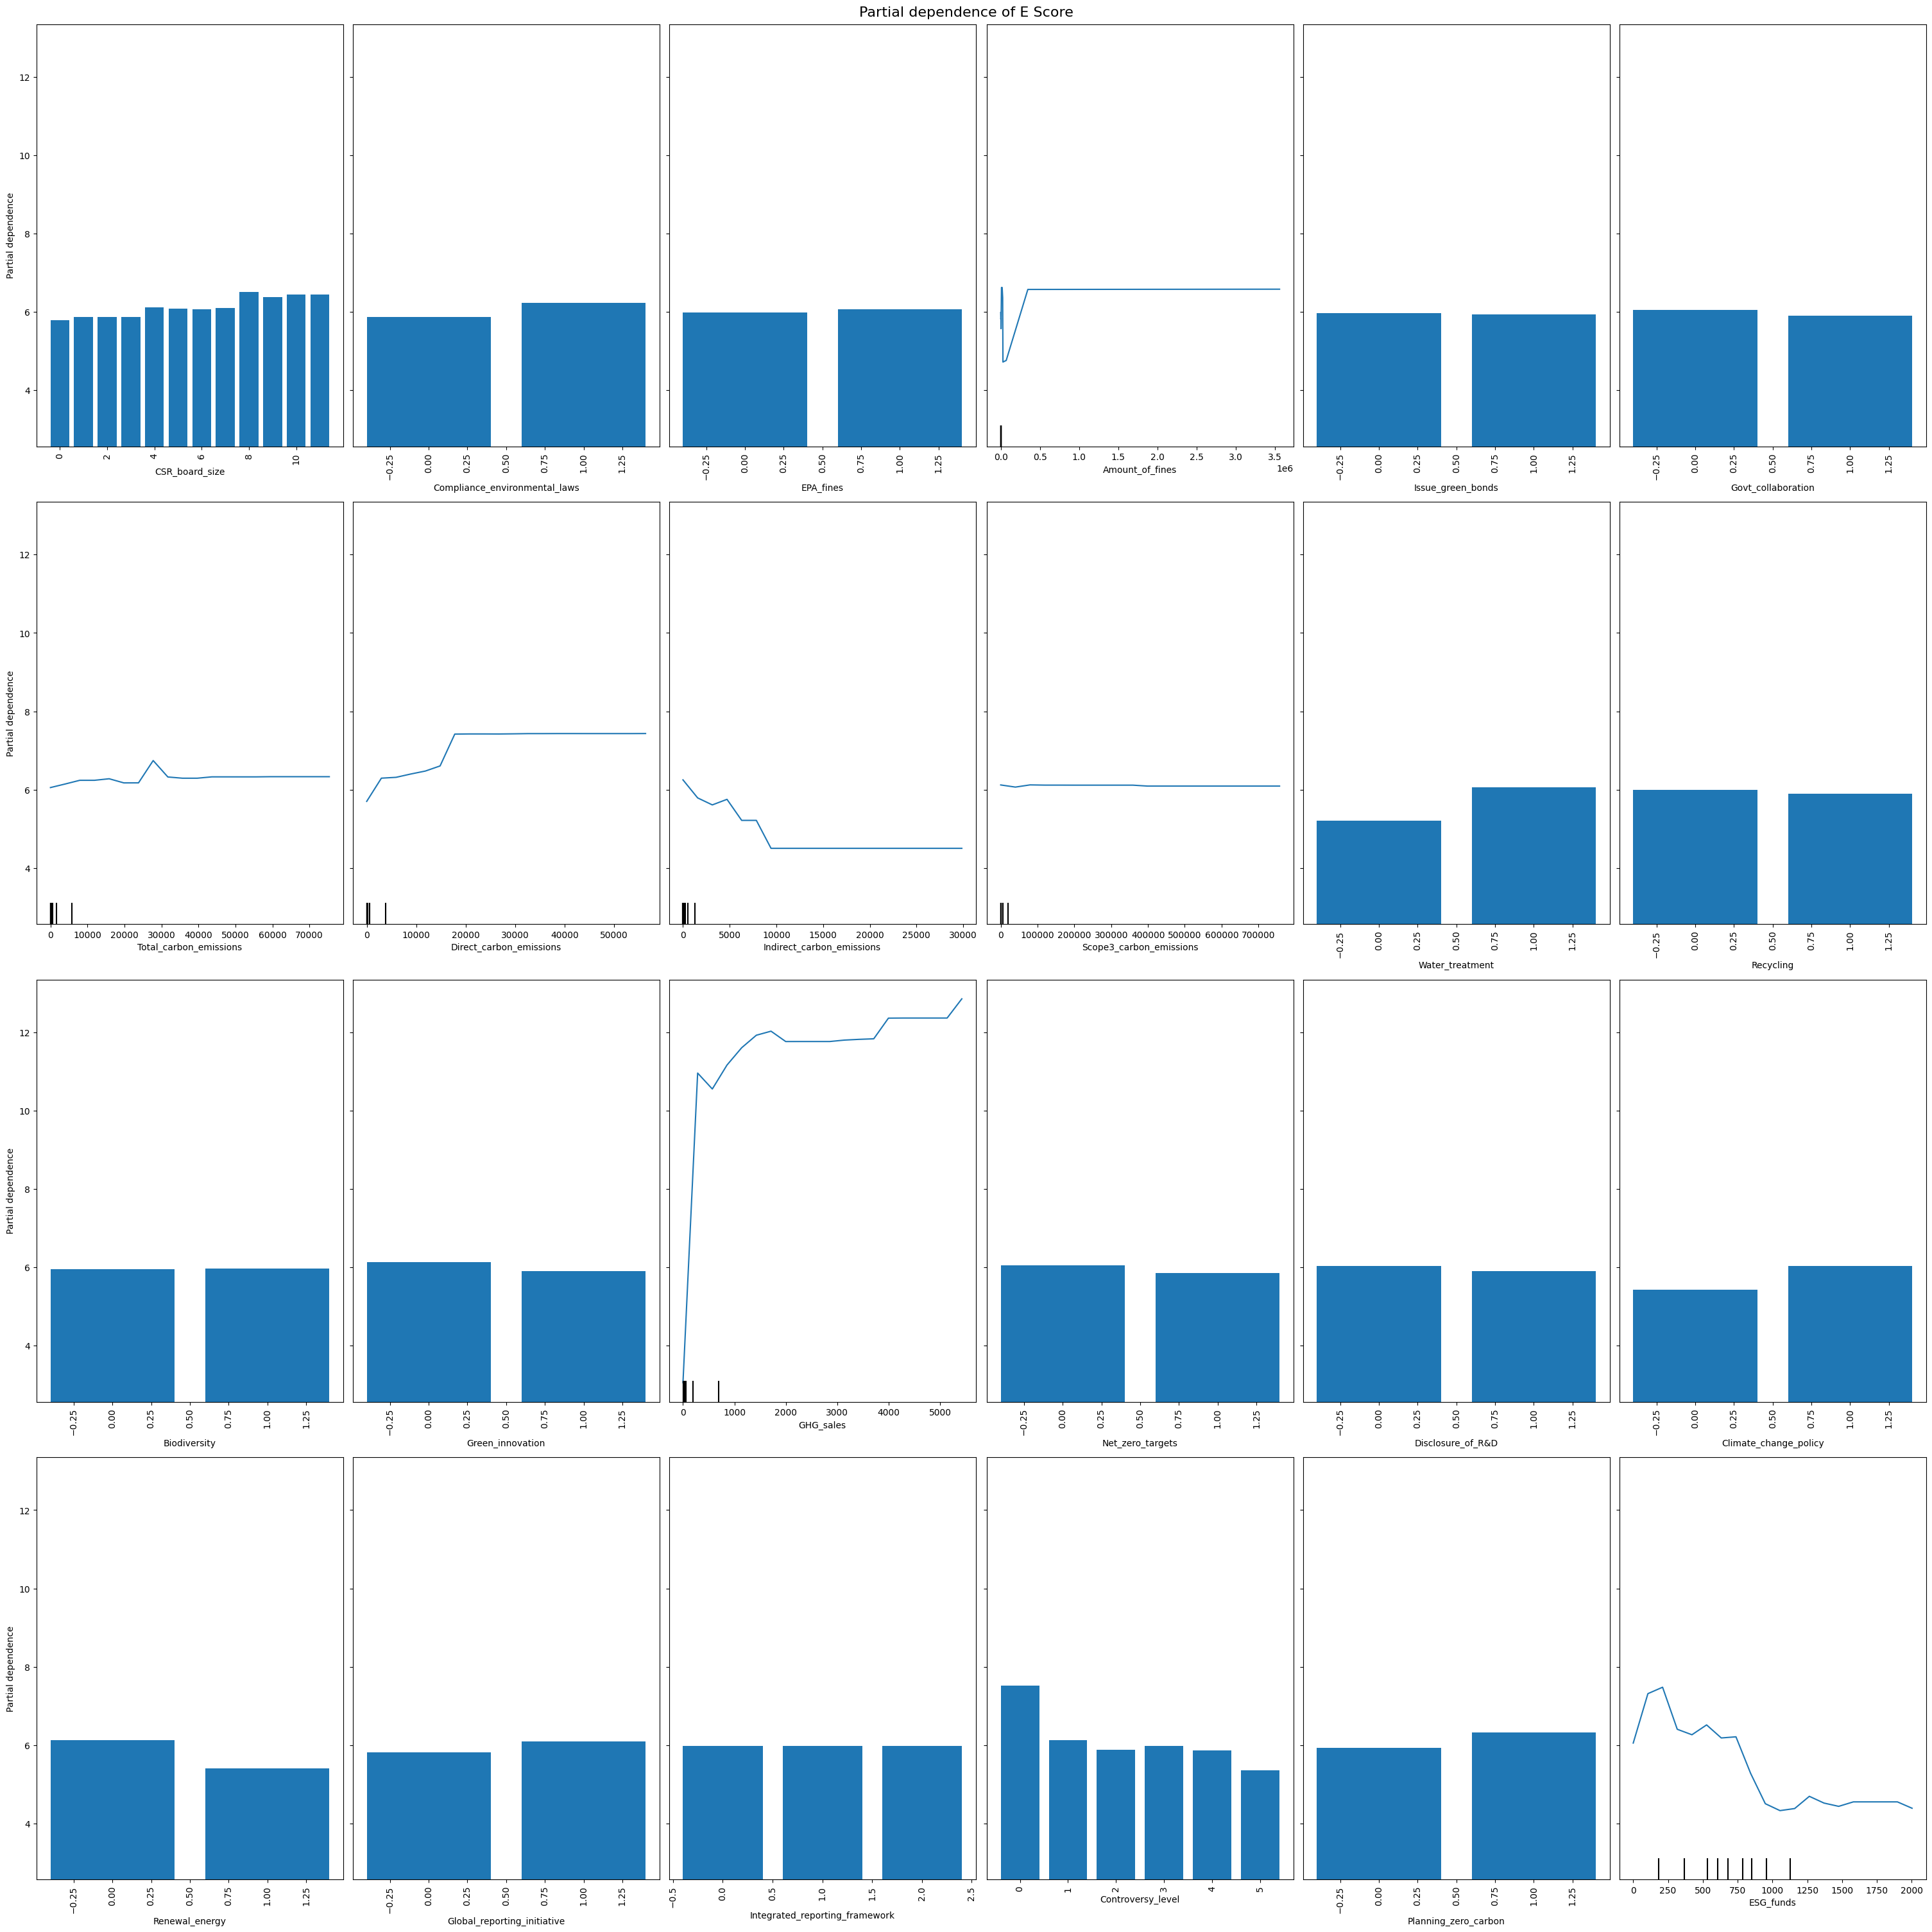

In [ ]:
pdp_plot("E",XGBRegressor)

Computing partial dependence plots...


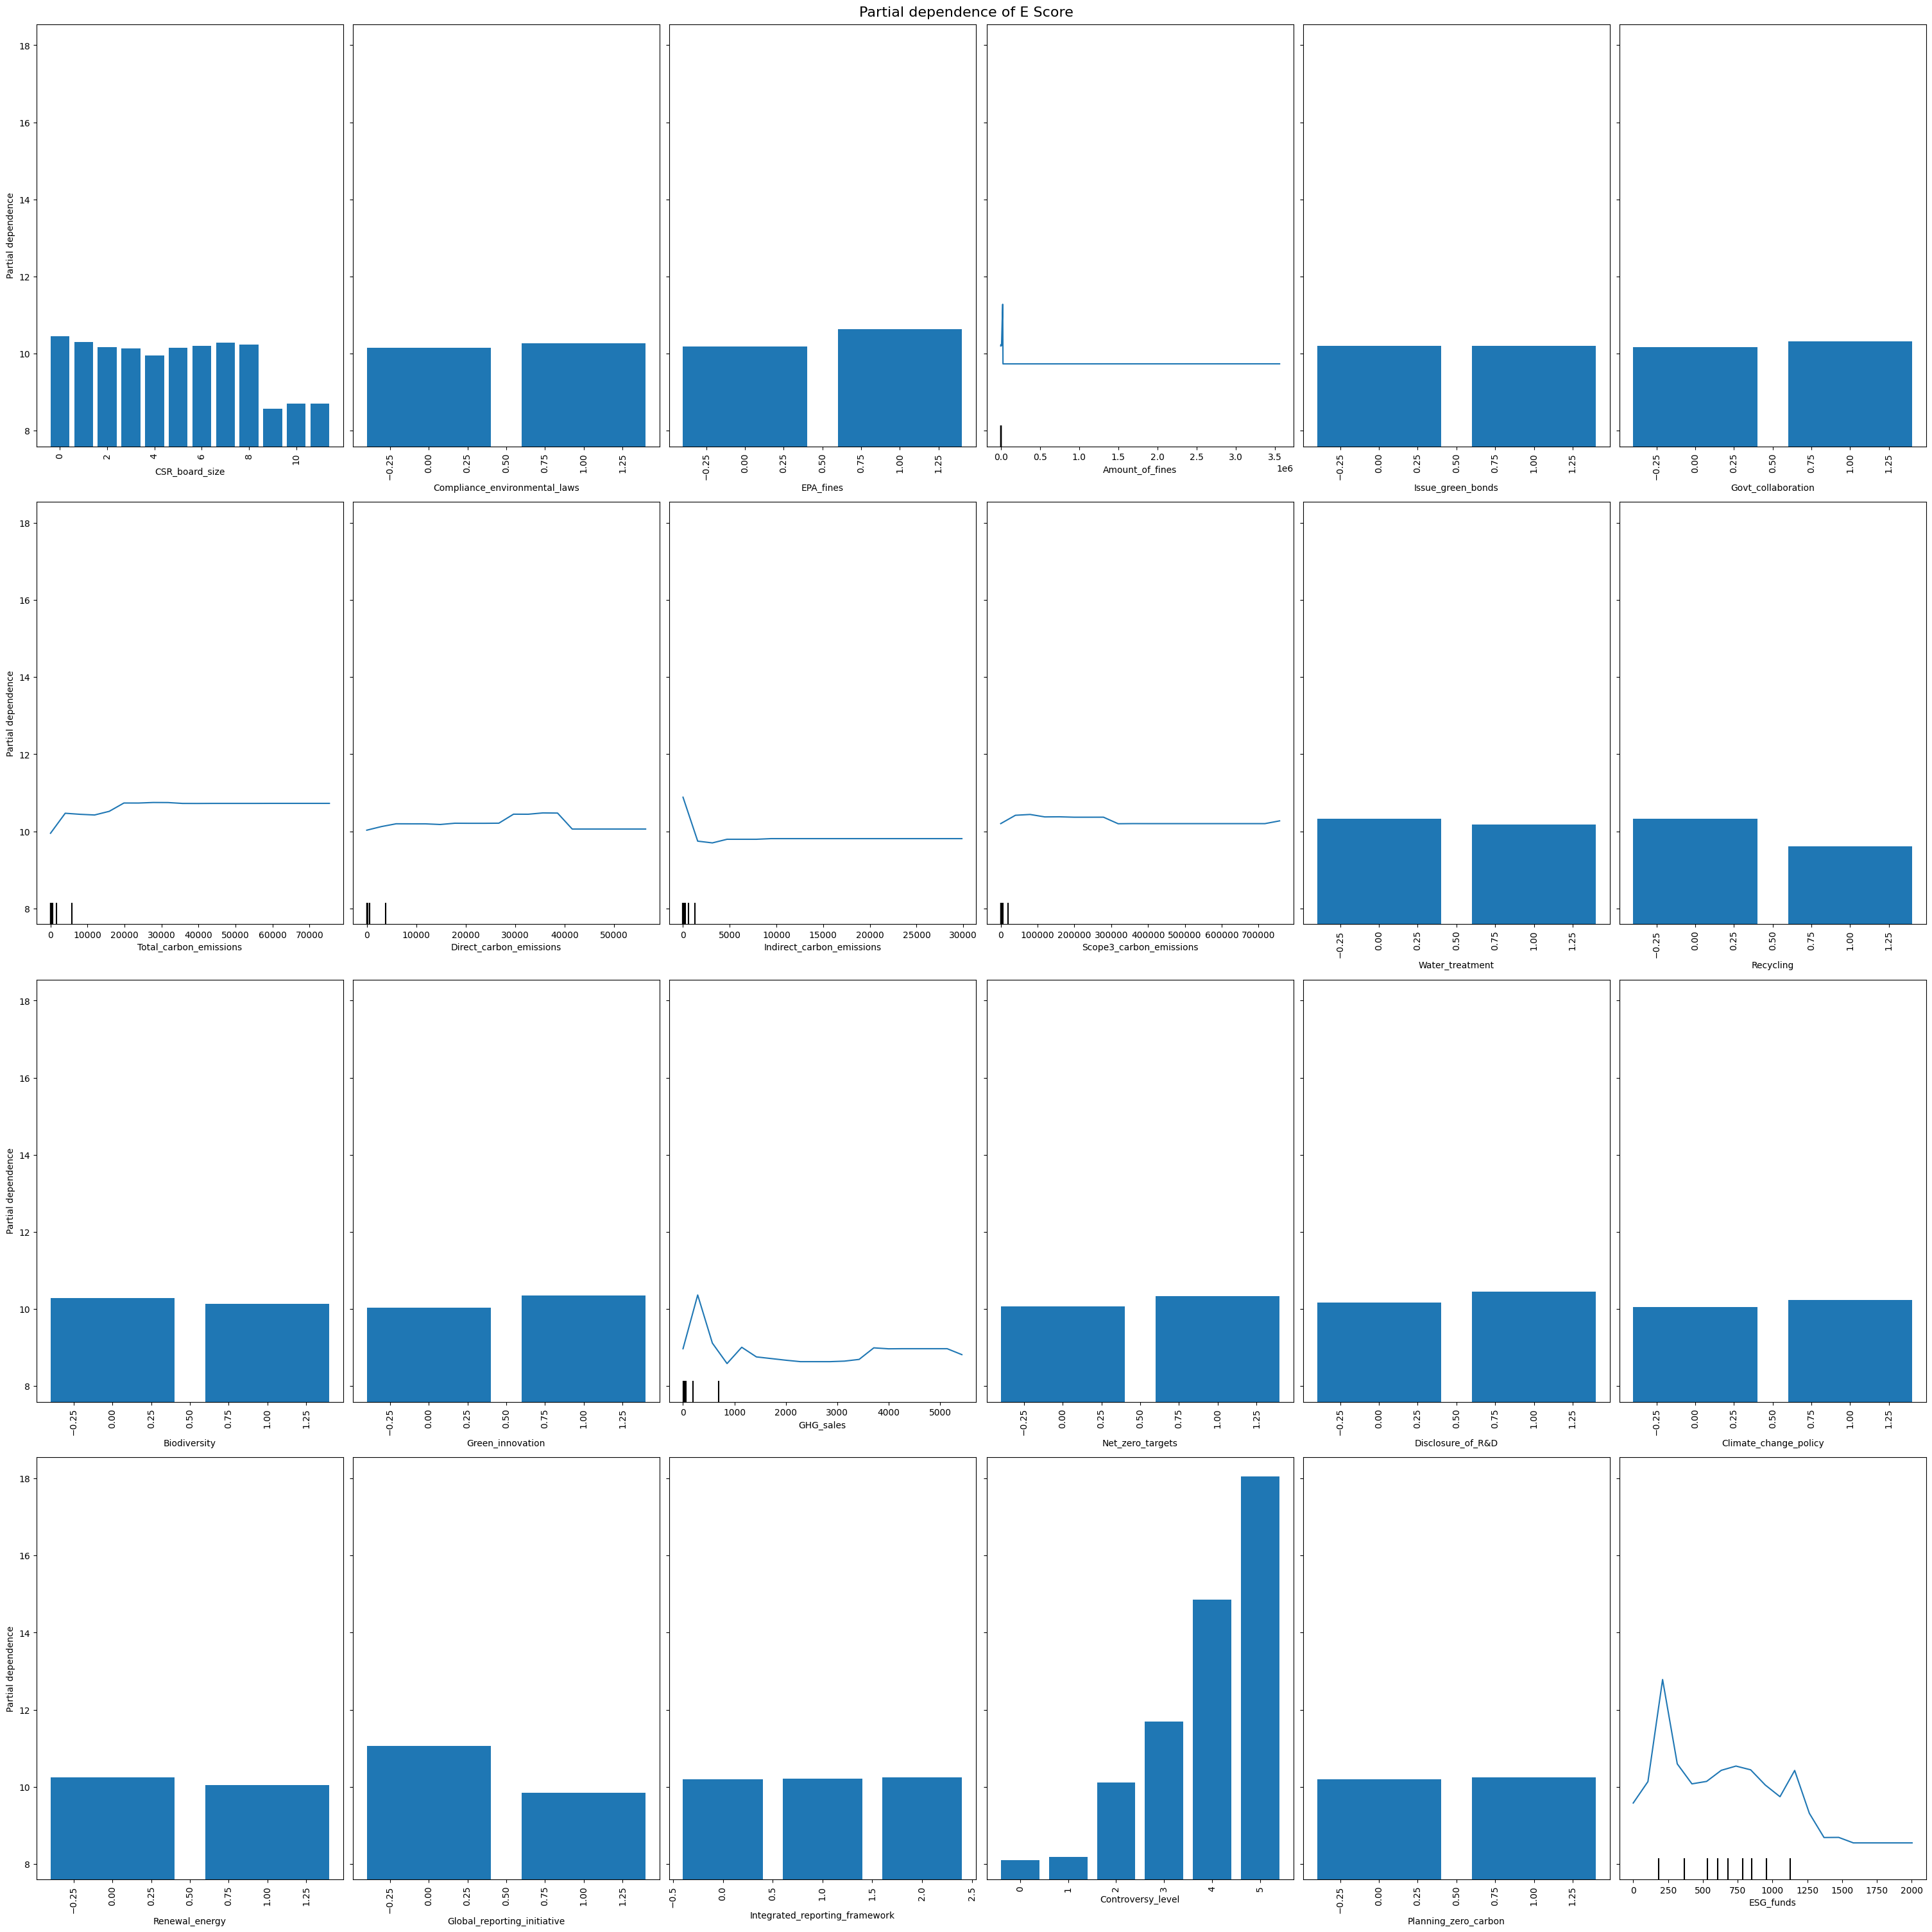

In [ ]:
pdp_plot("S",XGBRegressor)

Computing partial dependence plots...


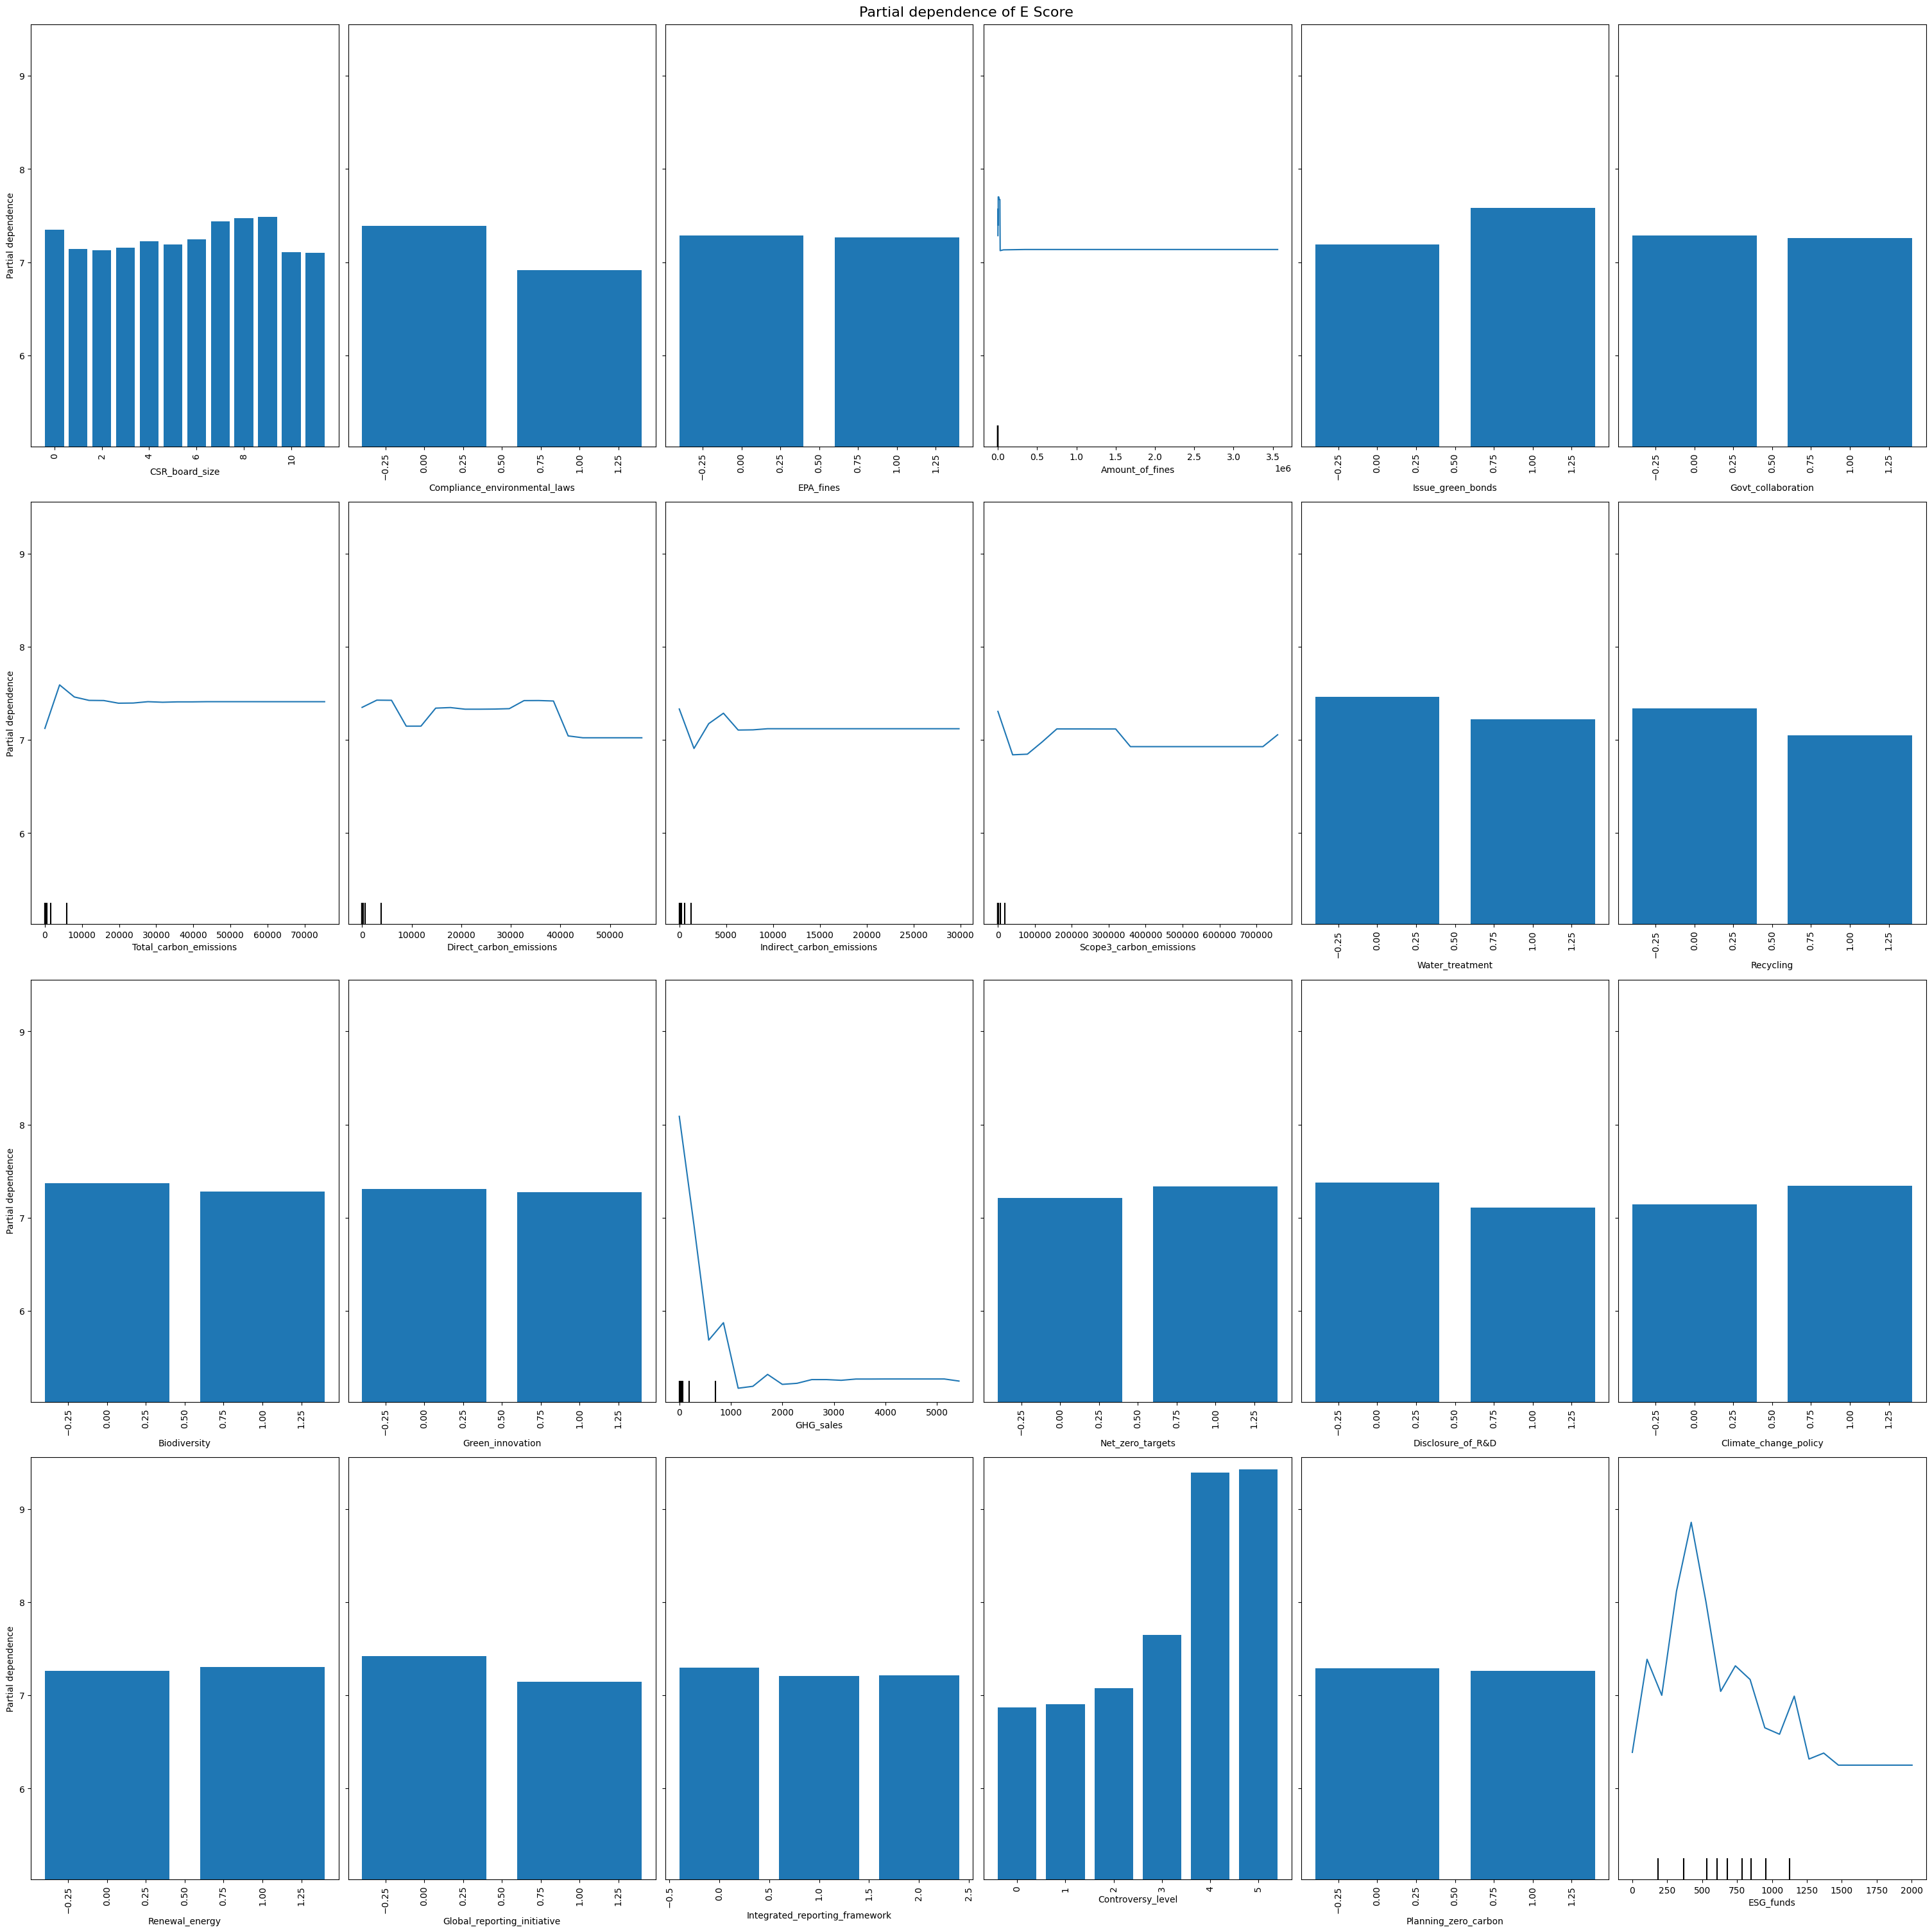

In [ ]:
pdp_plot("G",XGBRegressor)

In [ ]:
def feature_importance(type):
  print(type)
  if type=="E":
    pipeline=model_e[e_best_model]
  elif type=="S":
    pipeline=model_s[s_best_model]
  elif type=="G":
    pipeline=model_g[g_best_model]
  features=pipeline[:-1].get_feature_names_out()
  for i in range(len(features)):
    features[i]=features[i].replace("scaling__","").replace("passthrough__","").replace("&","\&").replace("_","\_")
  feature_weights=zip(features,pipeline[-1].coef_)
  feature_weights=sorted(feature_weights, key=lambda x: abs(x[1]), reverse=True)
  feature_weights.append((" ",pipeline[-1].intercept_))
  for m, c in feature_weights:
    print(m,": ",c)
  with open('fw_model_'+type.lower()+'.pkl', 'wb') as f:
    pickle.dump(feature_weights, f)

e_best_model=LinearRegression
s_best_model=LinearRegression
g_best_model=LinearRegression

E , <class 'sklearn.linear_model._base.LinearRegression'>
Best Parameters: {'rfe__n_features_to_select': 20}
RMSE:  4.083317671877288
R2 score : 0.42881627633931896
Adjusted R2 score : 0.4032885121533667


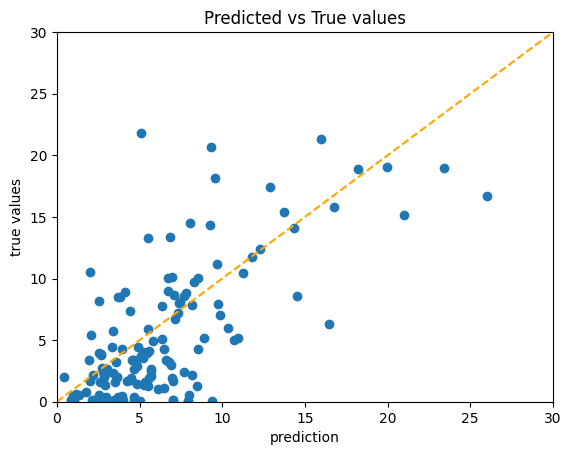

E
Biodiversity :  1.969618296041676
Renewal\_energy :  -1.9663274688119958
GHG\_sales :  1.7199332048428464
EPA\_fines :  1.4925292098759708
Climate\_change\_policy :  1.4897271410115867
Water\_treatment :  1.311961145355626
Green\_innovation :  -1.2601951159699532
Issue\_green\_bonds :  -1.1005070284867862
Govt\_collaboration :  -1.0904990853722278
Compliance\_environmental\_laws :  0.9505358749647693
ESG\_funds :  -0.8780109452000896
Direct\_carbon\_emissions :  0.7909044695311219
Net\_zero\_targets :  -0.7861880511368852
CSR\_board\_size :  0.7028200624436908
Recycling :  0.6987395019661681
Global\_reporting\_initiative :  0.5912626450752463
Disclosure\_of\_R\&D :  -0.384866124237407
Scope3\_carbon\_emissions :  0.280949998725936
Amount\_of\_fines :  0.22631002951954882
Planning\_zero\_carbon :  0.11283214234553557
  :  4.282121792771733


In [ ]:
y_pred_e={}
model_e={}
train_model("E",e_best_model,y_pred_e,model_e)
feature_importance("E")
y_pred_s={}
model_s={}
train_model("S",s_best_model,y_pred_s,model_s)
feature_importance("S")
y_pred_g={}
model_g={}
train_model("G",g_best_model,y_pred_g,model_g)
feature_importance("G")

train_model("E",e_best_model,y_pred_e,model_e,prod=True)
train_model("S",s_best_model,y_pred_s,model_s,prod=True)
train_model("G",g_best_model,y_pred_g,model_g,prod=True)
with open('model_e.pkl', 'wb') as f:
  pickle.dump(model_e[e_best_model], f)
with open('model_s.pkl', 'wb') as f:
  pickle.dump(model_s[s_best_model], f)
with open('model_g.pkl', 'wb') as f:
  pickle.dump(model_g[g_best_model], f)

# Deployment
TODO: explain score

In [ ]:
!mkdir pages

In [ ]:
%%writefile helper.py

import streamlit as st

def defaults():
    st.session_state.saved_values = {
        "Water_treatment": 0,
        "GHG_sales": 0,
        "Biodiversity": 0,
        "Global_reporting_initiative": 0,
        "Climate_change_policy": 0,
        "Govt_collaboration": 0,
        "Recycling": 0,
        "ESG_funds": 0,
        "Disclosure_of_R&D": 0,
        "EPA_fines": 0,
        "Waste_management": 0,
        "Controversy_level": 3,
        "Integrated_reporting_framework": 0,
        "Indirect_carbon_emissions": 0,
        "Planning_zero_carbon": 0,
        "Green_innovation": 0,
        "S": 0,
        "Waste_management": 0,
        "CSR_board_size": 0,
        "Net_zero_targets": 0,
        "Issue_green_bonds": 0,
        "Scope3_carbon_emissions": 0,
        'Compliance_environmental_laws': 0,
        'Amount_of_fines' : 0,
        'Total_carbon_emissions' : 0,
        'Direct_carbon_emissions' : 0,
        'Renewal_energy': 0
    }

def update_value(key):
    st.session_state.saved_values[key]=st.session_state[key]

Writing helper.py


In [ ]:
%%writefile Homepage.py

import streamlit as st
import pickle

st.set_page_config(page_title="Homepage", page_icon="📕")

st.markdown("# ESG Score Calculator Homepage")
st.sidebar.header("Homepage")

with open('fw_model_e.pkl', 'rb') as f:
  feature_weights_e = pickle.load(f)
with open('fw_model_s.pkl', 'rb') as f:
  feature_weights_s = pickle.load(f)
with open('fw_model_g.pkl', 'rb') as f:
  feature_weights_g = pickle.load(f)
st.write('Welcome to ESG Score Calculator. The calculator is used to calculate the Sustainalytics ESG Risk Score using equations discovered using our machine learning algorithms. '+ \
         'The formula of the equations are documented as follow: ')
st.markdown("## E Score Equation")
e_equation="E Score = "
for i, (f,c) in enumerate(feature_weights_e):
  if c>0 and i>0:
    e_equation+=f"+ {round(c,2)}*{f}"
  else:
    e_equation+=f" {round(c,2)}*{f}"
  if (i-2)%3==0:
    st.latex(e_equation)
    e_equation=""
st.latex(e_equation[:-2])

st.markdown("## S Score Equation")
s_equation="S Score = "
for i, (f,c) in enumerate(feature_weights_s):
  if c>0 and i>0:
    s_equation+=f"+ {round(c,2)}*{f}"
  else:
    s_equation+=f" {round(c,2)}*{f}"
  if (i-2)%3==0:
    st.latex(s_equation)
    s_equation=""
st.latex(s_equation[:-2])

st.markdown("## G Score Equation")
g_equation="G Score = "
for i, (f,c) in enumerate(feature_weights_g):
  if c>0 and i>0:
    g_equation+=f"+ {round(c,2)}*{f}"
  else:
    g_equation+=f" {round(c,2)}*{f}"
  if (i-2)%3==0:
    st.latex(g_equation)
    g_equation=""
st.latex(g_equation[:-2])

st.markdown("## ESG Score Equation")
st.latex(r'''ESG Risk Score = E Score + S Score + G Score''')


Overwriting Homepage.py


In [ ]:
%%writefile pages/1_ESG_Score_Calculator.py

import streamlit as st
from helper import defaults, update_value

import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import RFE
import pickle

st.set_page_config(page_title="Calculator", page_icon="🧮")

st.markdown("# ESG Score Calculator")
st.sidebar.header("Calculator")

with open('model_e.pkl', 'rb') as f:
  model_e = pickle.load(f)
with open('model_s.pkl', 'rb') as f:
  model_s = pickle.load(f)
with open('model_g.pkl', 'rb') as f:
  model_g = pickle.load(f)

if "saved_values" not in st.session_state:
    defaults()
else:
  for key in st.session_state.saved_values:
    st.session_state[key]=st.session_state.saved_values[key]

num_input=["GHG_sales","ESG_funds","Indirect_carbon_emissions","CSR_board_size","Scope3_carbon_emissions","Net_zero_targets", 'Amount_of_fines', 'Total_carbon_emissions', 'Direct_carbon_emissions', ]
for num in num_input:
  st.number_input(num.replace("-"," "),key=num, on_change=update_value, args=[num])

st.slider("Controversy level", 0, 5, key="Controversy_level", on_change=update_value, args=["Controversy_level"])

cat_input=["Water_treatment","Biodiversity","Global_reporting_initiative","Climate_change_policy","Govt_collaboration","Recycling","Disclosure_of_R&D","EPA_fines","Waste_management","Integrated_reporting_framework",\
           "Planning_zero_carbon","Green_innovation","S","Issue_green_bonds", 'Compliance_environmental_laws', 'Renewal_energy']

for cat in cat_input:
  st.checkbox(cat.replace("-"," "),key=cat, on_change=update_value, args=[cat])

submitted = st.button("Submit")

if submitted:
  test=pd.DataFrame(st.session_state.saved_values,index=[0])
  e_score=model_e.predict(test)[0]
  s_score=model_s.predict(test)[0]
  g_score=model_g.predict(test)[0]
  st.write(f"E Score: {round(e_score,2)}")
  st.write(f"S Score: {round(s_score,2)}")
  st.write(f"G Score: {round(g_score,2)}")
  st.write(f"ESG Score: {round(e_score+s_score+g_score,2)}")

Overwriting pages/1_ESG_Score_Calculator.py


In [ ]:
%%writefile pages/2_ESG_Score_Explainer.py

import streamlit as st
from helper import defaults, update_value
import pickle

st.set_page_config(page_title="Explainer", page_icon="⚖️")

st.markdown("# ESG Score Explainer")
st.sidebar.header("Explainer")

with open('fw_model_e.pkl', 'rb') as f:
  feature_weights_e = pickle.load(f)
  feature_weights_e.pop()
with open('fw_model_s.pkl', 'rb') as f:
  feature_weights_s = pickle.load(f)
  feature_weights_s.pop()
with open('fw_model_g.pkl', 'rb') as f:
  feature_weights_g = pickle.load(f)
  feature_weights_g.pop()

with open('model_e.pkl', 'rb') as f:
  model_e = pickle.load(f)
with open('model_s.pkl', 'rb') as f:
  model_s = pickle.load(f)
with open('model_g.pkl', 'rb') as f:
  model_g = pickle.load(f)

if "saved_values" not in st.session_state:
    defaults()
else:
  for key in st.session_state.saved_values:
    st.session_state[key]=st.session_state.saved_values[key]

#Button to select E, S, G, or total
st.selectbox(
    "Pillar to be Analyzed",
    ("E", "S", "G", "ESG"), key="component")

#slider to choose n
st.slider("Number of Key Factors", 1, 5, key="n_features")

submitted = st.button("Submit")

if submitted:
  #save the sum of contribution of each relevant feature to a dict
  contribution={}
  if "E" in st.session_state['component']:
    transformed=model_e[:-1].transform(pd.DataFrame(st.session_state.saved_values,index=[0]))[0]
    col_names=[]
    for i in range(len(model_e[:-1].get_feature_names_out())):
      col_names.append(model_e[:-1].get_feature_names_out()[i].split("__")[1])
    transformed=pd.DataFrame(transformed.reshape(1,-1),columns=col_names)
    for f,w in feature_weights_e:
      f=f.replace("\\","")
      if f not in contribution: contribution[f]=0
      contribution[f]+=w*transformed[f][0]
  if "S" in st.session_state['component']:
    transformed=model_s[:-1].transform(pd.DataFrame(st.session_state.saved_values,index=[0]))[0]
    col_names=[]
    for i in range(len(model_s[:-1].get_feature_names_out())):
      col_names.append(model_s[:-1].get_feature_names_out()[i].split("__")[1])
    transformed=pd.DataFrame(transformed.reshape(1,-1),columns=col_names)
    for f,w in feature_weights_s:
      f=f.replace("\\","")
      if f not in contribution: contribution[f]=0
      contribution[f]+=w*transformed[f][0]
  if "G" in st.session_state['component']:
    transformed=model_g[:-1].transform(pd.DataFrame(st.session_state.saved_values,index=[0]))[0]
    col_names=[]
    for i in range(len(model_g[:-1].get_feature_names_out())):
      col_names.append(model_g[:-1].get_feature_names_out()[i].split("__")[1])
    transformed=pd.DataFrame(transformed.reshape(1,-1),columns=col_names)
    for f,w in feature_weights_g:
      f=f.replace("\\","")
      if f not in contribution: contribution[f]=0
      contribution[f]+=w*transformed[f][0]

  #sort the dict by value and select the top n and bottom n
  contribution_sorted=sorted(contribution.items(), key=lambda x: x[1]) #lower is better
  top_n=contribution_sorted[:st.session_state.n_features]
  bottom_n=contribution_sorted[-st.session_state.n_features-1:-1][::-1]

  #output
  st.markdown("## Top Positive Factors")
  for i in range(len(top_n)):
    st.write(f"{top_n[i][0]} : {top_n[i][1]}")
  st.markdown("## Top Negative Factors")
  for i in range(len(bottom_n)):
    st.write(f"{bottom_n[i][0]} : {bottom_n[i][1]}")

Overwriting pages/2_ESG_Score_Explainer.py


In [ ]:
!streamlit run Homepage.py &>/content/logs.txt &

In [ ]:
!cat /content/logs.txt

In [ ]:
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.75.75.171
npx: installed 22 in 2.076s
your url is: https://public-donkeys-build.loca.lt


# End of Code